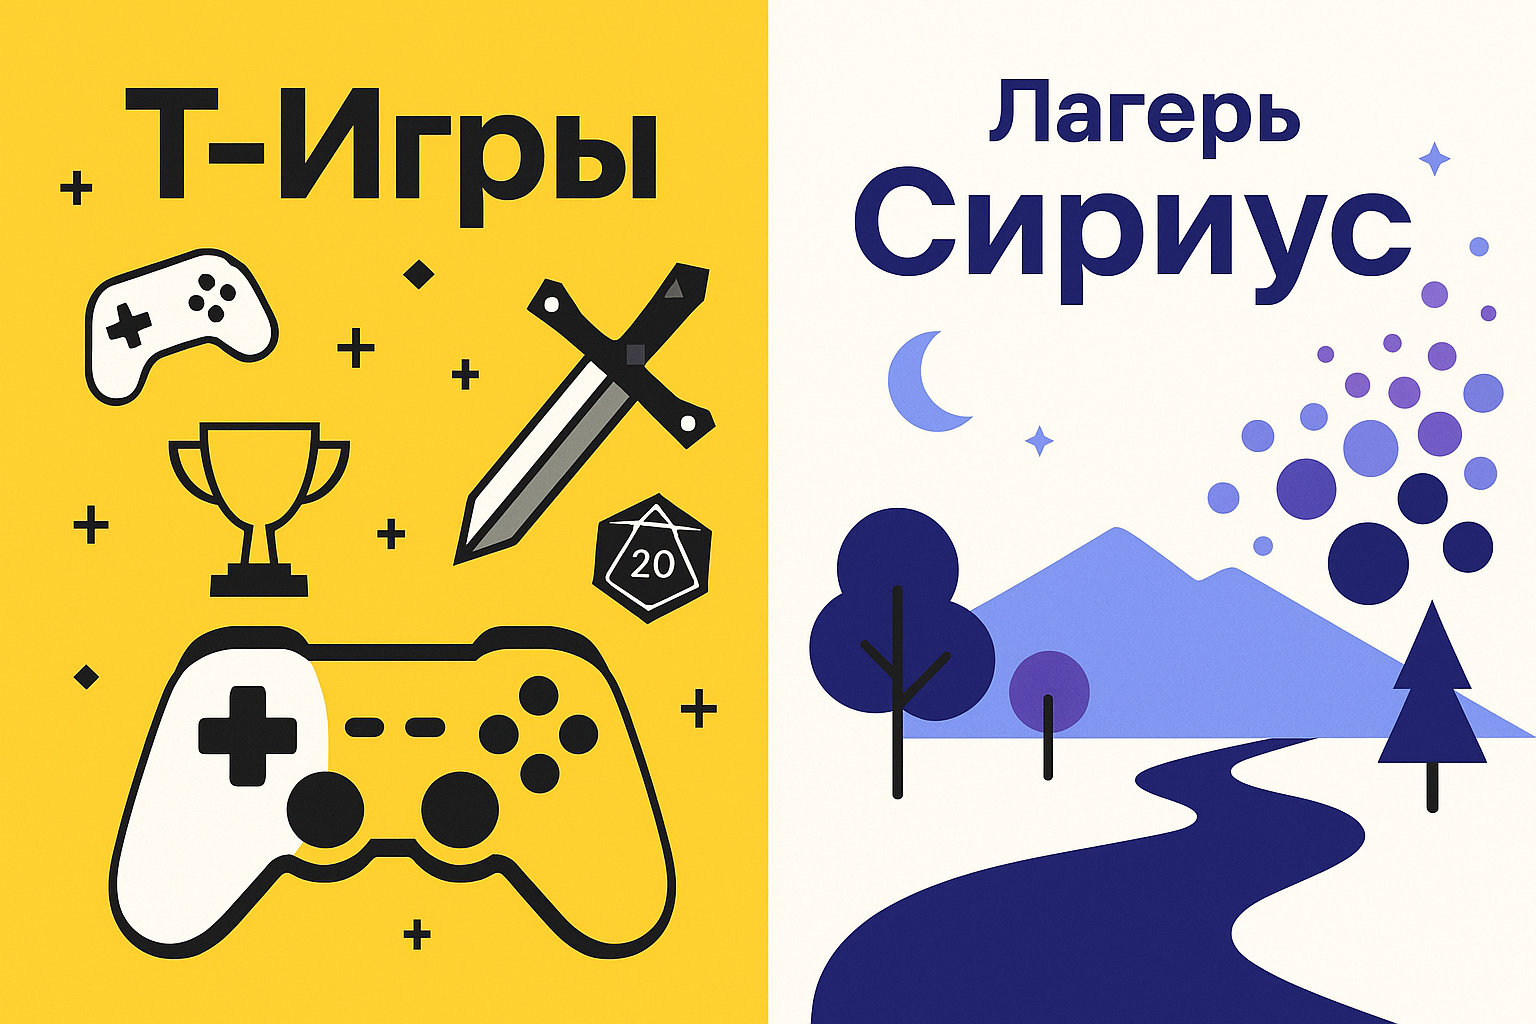

**Т-Банк: сервис Игры**

Исследование и анализ данных для отбора на смену продуктовой аналитике в Сириусе 2025

**Описание данных**:


Тинькофф Город – это группа сервисов, которые помогают пользователям решать
ежедневные задачи. Например, есть сервисы, которые позволяют купить билеты
в кино или заказать продукты. Один из сервисов – Игры. Через них можно купить
доступ к игре с кэшбэком 5%. Вам дана информация по каждому заказу и играм,
которые пользователь купил в рамках этого заказа. Важный момент: клиент может
в один заказ положить несколько игр, поэтому идентификатор заказа повторяется
в таблице! Данные предоставлены по 2022 и 2023 годам (с 01-01-2022
по 29-10-2023)

**Наименование столбцов**

***Информация про игры:***

Id - идентификатор заказа

Client_id - идентификатор клиента

Order_day - дата заказа

Category_id - идентификатор категории

Category_name - название категории

Good_id - идентификатор товара

Good_name - название товара

Good_price - цена товара

Good_cnt - количество этого товара в заказе

Steam_popularity_score - позиция в «ТОП 5000 популярных игр» в Steam

---


***Информация про клиентов:***

Gender_cd - пол клиента

Age - возраст клиента

Education_level - уровень образования клиента

City_nm - город проживания клиента

Monthly_income_amt - доход клиента

**Поставленная задача 1:**
Исследуйте портреты покупателей видеоигр и ответьте на вопросы:

*   Как игроки отличаются от других клиентов Т-Банка?
*   Чем отличаются заядлые покупатели игр?
*   Нацелены ли игры на разные аудитории? То есть, можно ли выделить несколько групп игр, покупатели которых сильно отличаются друг от друга?
*   Справедливы ли выводы предыдущих пунктов на всем представленном временном промежутке?


**1 этап:** Загрузка и первичный осмотр данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, kruskal, chi2_contingency
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
!gdown 1cvDbVMhQMEQE5L1xKXhODG-NyChBDAp5

Downloading...
From: https://drive.google.com/uc?id=1cvDbVMhQMEQE5L1xKXhODG-NyChBDAp5
To: /content/T_games_dataset.csv
100% 12.2M/12.2M [00:00<00:00, 62.8MB/s]


In [3]:
data = pd.read_csv('/content/T_games_dataset.csv')

Посмотрим на данные, которые лежат в датасете

In [4]:
data.sample(10)

id    client_id   order_day  category_id  category_name  \
79068  1500370995  5-2C7C1MES7  2022-10-31        28574  Ролевые (RPG)   
60093  1500659707  5-3G2L4HI26  2023-09-02        28568           Инди   
63425  1500465891   5-GXSREHJ0  2023-02-01        28574  Ролевые (RPG)   
75790  1500504789  5-2RYW5BK45  2023-03-05        28577           Экшн   
10802  1500639808  5-3HXQW3ADF  2023-08-08        28579          Гонки   
556    1500567191  5-10KF5SK1M  2023-05-17        28568           Инди   
23125  1500658671  5-2DQMHMC43  2023-09-01        28577           Экшн   
32209  1500253209  5-1B3YA8Z0E  2022-05-05        28555      Стратегии   
65750  1500504671   5-I5UO8HWY  2023-03-05        29688         Скидки   
86768  1500458389  5-2WOJJFTO6  2023-01-23        28555      Стратегии   

       good_id                                          good_name  good_price  \
79068   880490  Pathfinder: Wrath of the Righteous - Enhanced ...      674.55   
60093   848845                          Neon Beats - Full Version       61.00   
63425  1392682           Crusader Kings III: Friends & Foes - DLC      200.00   
75790  1134394       Rise of the Tomb Raider: 20 Year Celebration     1299.00   
10802  1123760                                   VCB: Why City 4k       25.98   
556    1632292                                              Squad      989.10   
23125  1127093                                     Kitaria Fables      174.00   
32209  1182252                                         Beholder 3      360.00   
65750   890187                                     Partisans 1941      199.00   
86768  1275993           Stellaris: Overlord Expansion Pack - DLC      435.00   

       good_cnt gender_cd  age education_level          city_nm  \
79068       1.0         F   21             SCH           Москва   
60093       1.0         M   13             SCH           Москва   
63425       1.0         M   32             GRD            Пермь   
75790       1.0         M   30             SCH           Москва   
10802       1.0         M   16             GRD           Москва   
556         1.0         M   22             SCH  Санкт-Петербург   
23125       1.0         M   39             SCH      Новосибирск   
32209       1.0         M   32             UGR           Москва   
65750       1.0         M   39             SCH           Москва   
86768       1.0         M   24             SCH  Санкт-Петербург   

       monthly_income_amt  steam_popularity_score  
79068                2000                   176.0  
60093               90197                     0.0  
63425               74000                     0.0  
75790               64400                     0.0  
10802               93113                     0.0  
556                 50000                    77.0  
23125               26000                  3666.0  
32209               38000                  3328.0  
65750               50000                  2372.0  
86768               62000                     0.0

Определим размерность датасета

In [5]:
data.shape

(88699, 15)

Посмотрим на названия признаков

In [6]:
data.columns

Index(['id', 'client_id', 'order_day', 'category_id', 'category_name',
       'good_id', 'good_name', 'good_price', 'good_cnt', 'gender_cd', 'age',
       'education_level', 'city_nm', 'monthly_income_amt',
       'steam_popularity_score'],
      dtype='object')

Изучим типы данных признаков

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88699 entries, 0 to 88698
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      88699 non-null  int64  
 1   client_id               88699 non-null  object 
 2   order_day               88699 non-null  object 
 3   category_id             88699 non-null  int64  
 4   category_name           88699 non-null  object 
 5   good_id                 88699 non-null  int64  
 6   good_name               88699 non-null  object 
 7   good_price              88699 non-null  float64
 8   good_cnt                88699 non-null  float64
 9   gender_cd               88699 non-null  object 
 10  age                     88699 non-null  int64  
 11  education_level         88699 non-null  object 
 12  city_nm                 88699 non-null  object 
 13  monthly_income_amt      88699 non-null  int64  
 14  steam_popularity_score  88699 non-null

Посмотрим количество уникальных значений в каждом столбце

In [8]:
data.nunique()

id                        88699
client_id                 41298
order_day                   628
category_id                  25
category_name                25
good_id                    3237
good_name                  3140
good_price                 2866
good_cnt                      1
gender_cd                     2
age                          78
education_level               5
city_nm                      16
monthly_income_amt        37311
steam_popularity_score      517
dtype: int64

Проверим наличие пропусков в данных

In [9]:
data.isnull().sum()

id                        0
client_id                 0
order_day                 0
category_id               0
category_name             0
good_id                   0
good_name                 0
good_price                0
good_cnt                  0
gender_cd                 0
age                       0
education_level           0
city_nm                   0
monthly_income_amt        0
steam_popularity_score    0
dtype: int64

<Axes: >

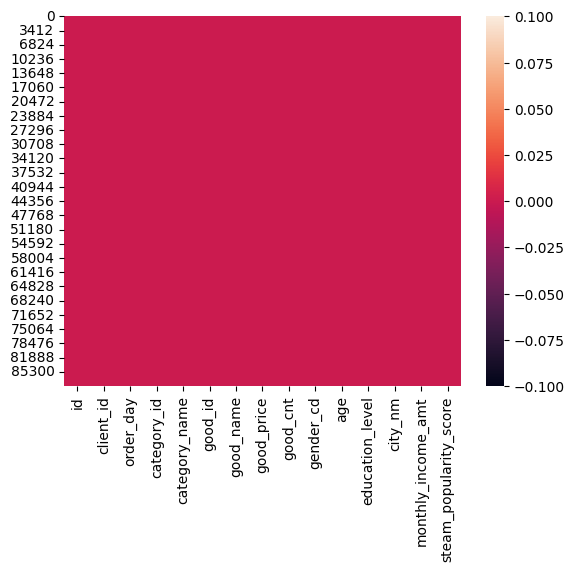

In [10]:
sns.heatmap(data.isnull())

Вывод: пропусков в данных нет

Проверим наличие дубликатов в данных

In [11]:
data.duplicated().sum() #дубликатов нет

np.int64(0)

Из условия задачи: "*клиент может в один заказ положить несколько игр, поэтому идентификатор заказа может повторяться в таблице!*"

Проверим, есть ли у нас такие заказы, в которых несколько игр

In [12]:
if data['id'].duplicated().sum() == 0 and len(data['id']) == len(data['id'].unique()):
  print('Дублированных id заказов нет')
else:
  print('Дублированные id есть')

Дублированных id заказов нет


Проверим датасет на пустые строки

In [13]:
data.apply(lambda x: x.eq('').sum()) #пустых строк нет

id                        0
client_id                 0
order_day                 0
category_id               0
category_name             0
good_id                   0
good_name                 0
good_price                0
good_cnt                  0
gender_cd                 0
age                       0
education_level           0
city_nm                   0
monthly_income_amt        0
steam_popularity_score    0
dtype: int64

Посчитаем количество уникальных пользователей

In [14]:
print('Количество уникальных пользователей:', len(data['client_id'].unique()))

Количество уникальных пользователей: 41298


**2 Этап:** Обработка и анализ числовых признаков

Сначала определим, какие признаки в датасете являются числовыми

In [15]:
numerical = ['good_price', 'age', 'monthly_income_amt', 'steam_popularity_score']

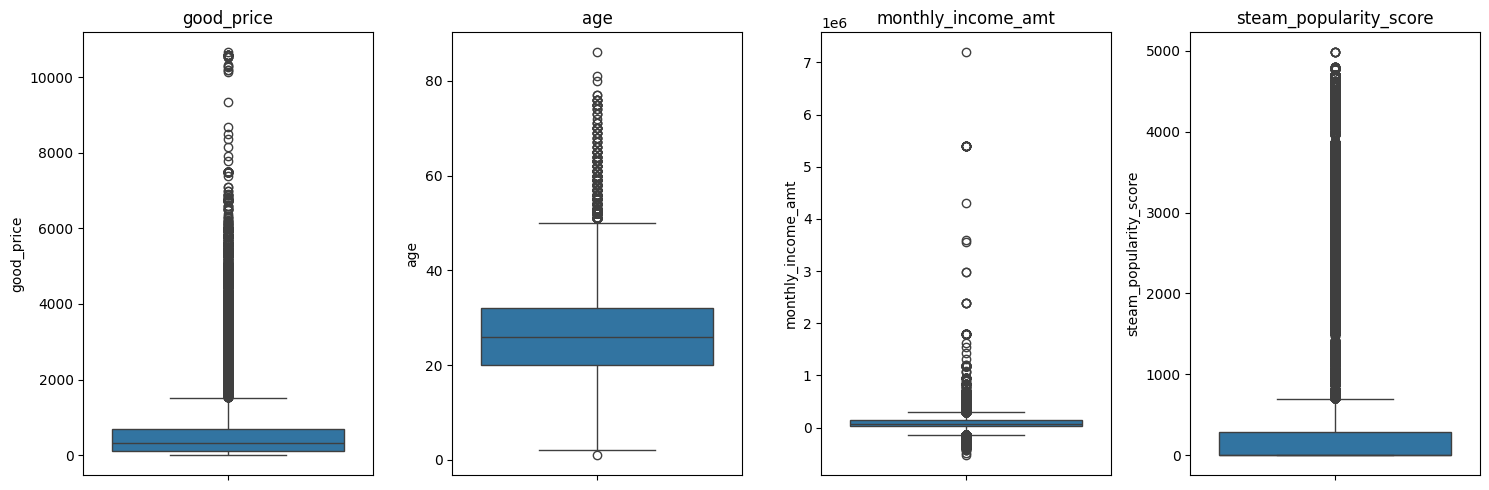

In [16]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical, 1):
    plt.subplot(1, len(numerical), i)
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

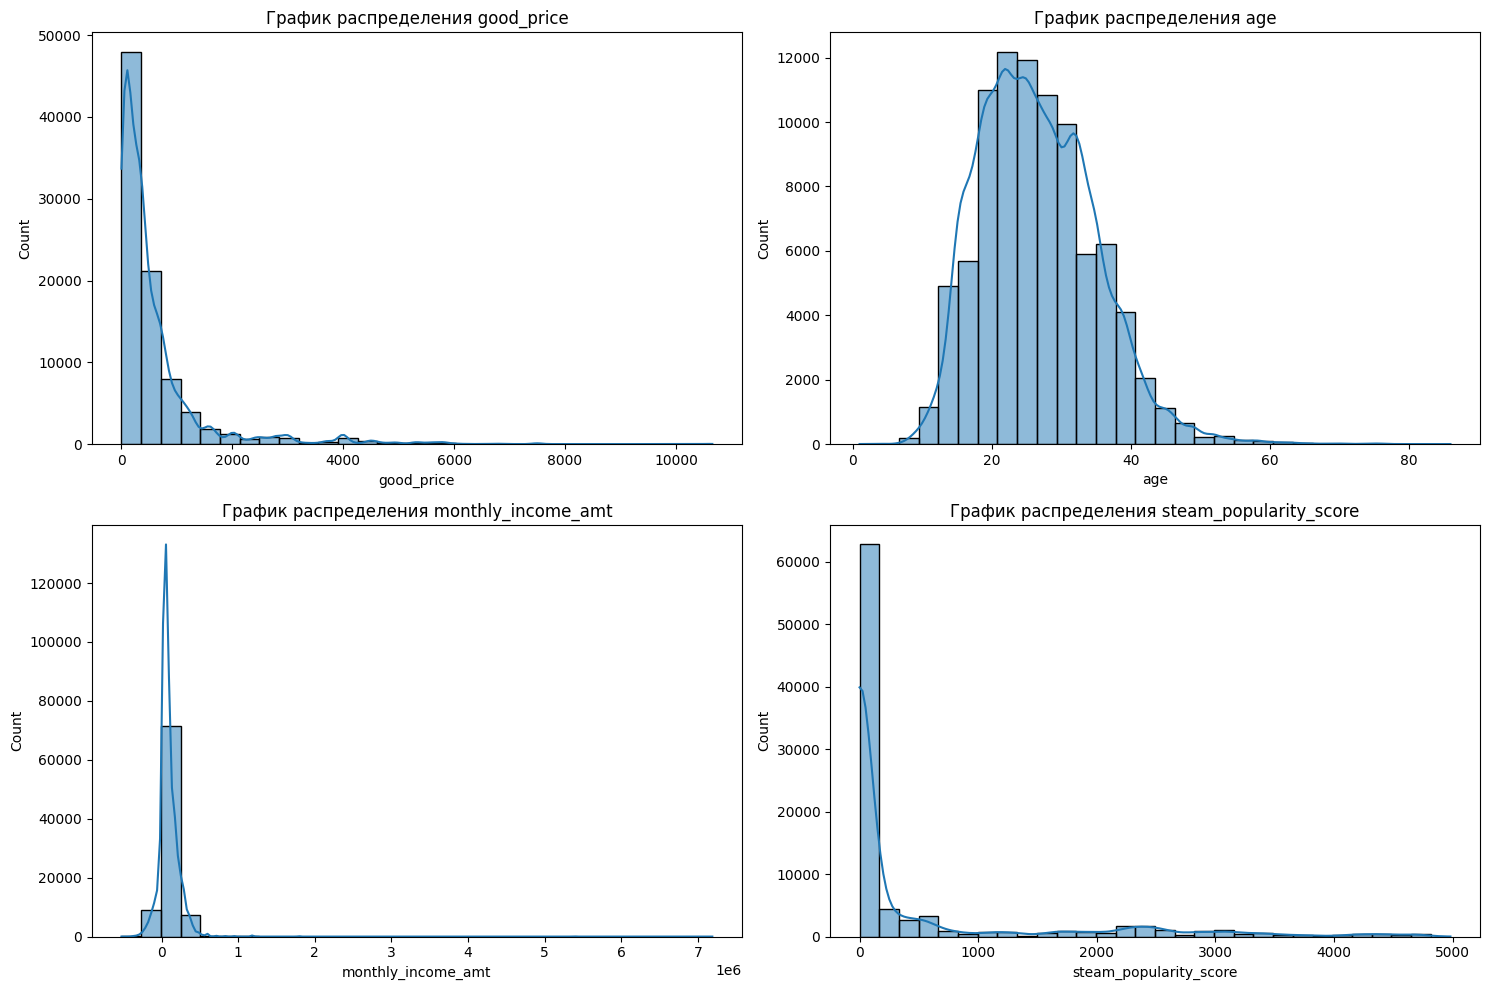

In [17]:
plt.figure(figsize=(15, 10))

for i, col in enumerate(numerical, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'График распределения {col}')

plt.tight_layout()
plt.show()

Проанализируем графики:

1) Пользоваться сервисом Т-Банк.Город могут только носители дебетовой карты, минимальный возраст для получения которой - 7 лет (карты Джуниор от Т-Банка). Значит всех пользователей, чей возраст <7 лет, убираем. А также удалим всех пользователей с возрастом >0.75 межквартильного размаха, так как они сильно выбиваются из общего тренда и могут негативно повлять на результаты аналитики.

In [18]:
q1 = data['age'].quantile(0.25)
q3 = data['age'].quantile(0.75)
iqr = q3 - q1
data = data[~(data['age'] > (q3 + 1.5 * iqr))]
data = data[~(data['age'] < 7)]

In [19]:
print(f'Всего при обработке возраста убрали {88699 - data.shape[0]} пользователей, что составляет {round((88699 - data.shape[0]) / 88699, 2) * 100}%')

Всего при обработке возраста убрали 716 пользователей, что составляет 1.0%


2) В данных по месячному доходу есть некорректные данные - записи с отрицательным доходом. Причин, по которой такие записи могли появится, две:

1. Баг при сборе данных и запись "-" в начало значения месячного дохода пользователя.
2. По картам пользователя в этом месяце больше трат, чем поступлений денежных средств.

Какая именно проблема в данном конкретном случае сказать сложно, это нужно обсуждать с инженерами данных, которые собирали этот датасет. Но так как у нас такой возможности нет, то принято решение удалить эти данные.

При удалении строк с отрицательными значениями месячного дохода мы потеряем возможность проверить гиоптезы, связанные с пользователями, у которых в прошлом месяце по счетам больше трат, чем постплений, например для вопроса "Чем отличаются заядлые покупатели игр?" можно было бы проверить гипотезу о том, что *Заядлые игроки готовы покупать игры даже когда они живут "в минус"*. Но такое возможно только при условии того, что 2 вариант верен и данные для датасета собирались именно так. Если верен 1 вариант и вся проблема только в баге, то мы можем найти несуществующую закономерность и, возможно, потерять на этом денги.

Еще раз подытожим: При такой проблеме в работе в компании я бы советовал обратиться к инженерам, которые собирали этот датасет и выяснить все вопросы, чтобы не терять возможность проверить все гипотезы. Но в текущий момент нам придется удалить данные, смириться с потерей гипотезы про клиентов, "живущих в минус", и отвечать на вопросы задания, исходя из изначально нормально собранных данных (благо даже при удлаении записей с отрицательным доходом (13.68%) количество данных остается достаточно большим)

P.S. Заменять отрицательные значения на медианное я бы тоже не стал, так как, если все-таки 2 вариант про "живущих в минус" верен и сбор датасета производился именно так, то мы будем анализировать эту обособленну группу на равне со всеми, что может негативно повлиять на объективность аналитики.


Удаляем пользоваталей с отрицательным значением дохода, а также пользователей, чей ежемесячный доход > 600 000, так как они сильно выбиваются из общего тренда и имеют единичные проявления, что может привести к неправильным выводам.

In [20]:
data = data[~((data['monthly_income_amt'] < 0) | (data['monthly_income_amt'] > 600000))]

In [21]:
print(f'Всего при обработке дохода удалили {87983 - data.shape[0]} пользователей, что составляет {round((87983 - data.shape[0]) / 87983, 4) * 100}%')

Всего при обработке дохода удалили 12039 пользователей, что составляет 13.68%


3) Записи steam_popularity_score изменять не будем, так как рейтинг игр действительно может быть очень разным и обозначение за "выброс" на boxplot в данном случае показывает лишь то, что большинство игр имеет низкую оценку, а высокий рейтинг у меньшего количества игр (что логично).

4) Записи good_price (цена товара) также изменять не будем, так как такие дорогие игры [действительно сущесвтуют в Steam](https://www.cybersport.ru/tags/games/samye-dorogie-igry-v-steam). И в будущем, возможно, мы сможем найти корелляцию между дороговизной игры (общей дороговизной суммы всех покупок) и другими признаками клиентов.

Посмторим на обновленные графики распределения

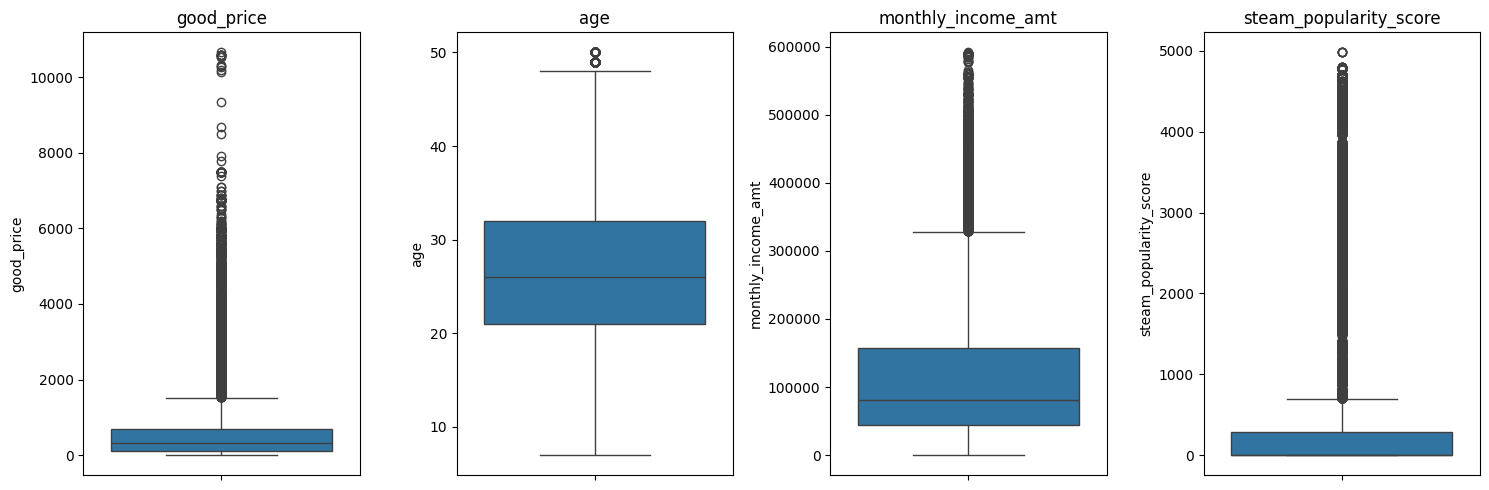

In [22]:
plt.figure(figsize=(15, 5))

for i, col in enumerate(numerical, 1):
    plt.subplot(1, len(numerical), i)
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Новая размерность датасета

In [23]:
data.shape

(75944, 15)

**3 Этап:** Обработка и анализ категориальных признаков

Сначала определим, какие признаки в датасете являются каегориальными

In [24]:
categorical = ['category_name', 'gender_cd', 'education_level', 'city_nm']

Проверим эти признаки на опечатки

In [25]:
for col in categorical:
  print(col, ':', data[col].unique(), '\n')

category_name : ['Скидки' 'Ролевые (RPG)' 'Казуальные игры' 'Экшн' 'Симуляторы' 'Инди'
 'Бестселлеры' 'Приключения' 'Стратегии' 'Шутеры' 'Гонки' 'Файтинги'
 'Хоррор' 'Другое' 'Anime' 'VR' 'Спорт' 'Аркады' 'Новинки' 'Для детей'
 'Предзаказы' 'Классика от Deep Silver' 'Xbox подписка' 'Онлайн (MMO)'
 'Карты оплаты'] 

gender_cd : ['M' 'F'] 

education_level : ['UGR' 'GRD' 'SCH' 'PGR' 'ACD'] 

city_nm : ['Москва' 'Самара' 'Санкт-Петербург' 'Омск' 'Волгоград' 'Екатеринбург'
 'Красноярск' 'Казань' 'Новосибирск' 'Нижний Новгород' 'Воронеж'
 'Ростов-на-Дону' 'Пермь' 'Челябинск' 'Краснодар' 'Уфа'] 



Опечаток нет, можем двигаться дальше

Введем новую категорию DLC. DLC (Downloadable Content) - дополнительный контент для компьютерных игр, который можно загрузить после выпуска основной версии игры. Ключевые слова для определения, что является DLC:

”DLC” - собственно само DLC

”edition” - издание

”pack” - пакет, набор

”collection” - коллекция

”bundle” - набор

”anthology” - антология

In [26]:
import re

dlc_keywords = ['DLC', 'edition', 'pack', 'collection', 'bundle', 'anthology']

def is_dlc_regex(game_name):
    pattern = r'\b(DLC|edition|pack|collection|bundle|anthology)\b'
    return bool(re.search(pattern, str(game_name), re.IGNORECASE))

dlc_mask = data['good_name'].apply(is_dlc_regex)

data['category_name'] = np.where(dlc_mask, 'DLC', data['category_name'])

Посмотрим на распределение внутри категориальных признаков

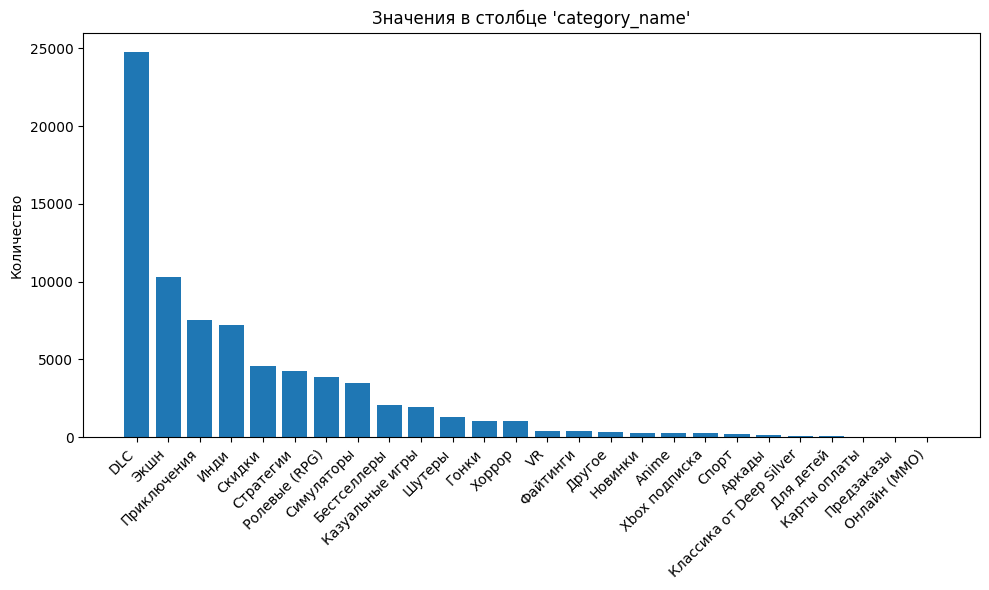

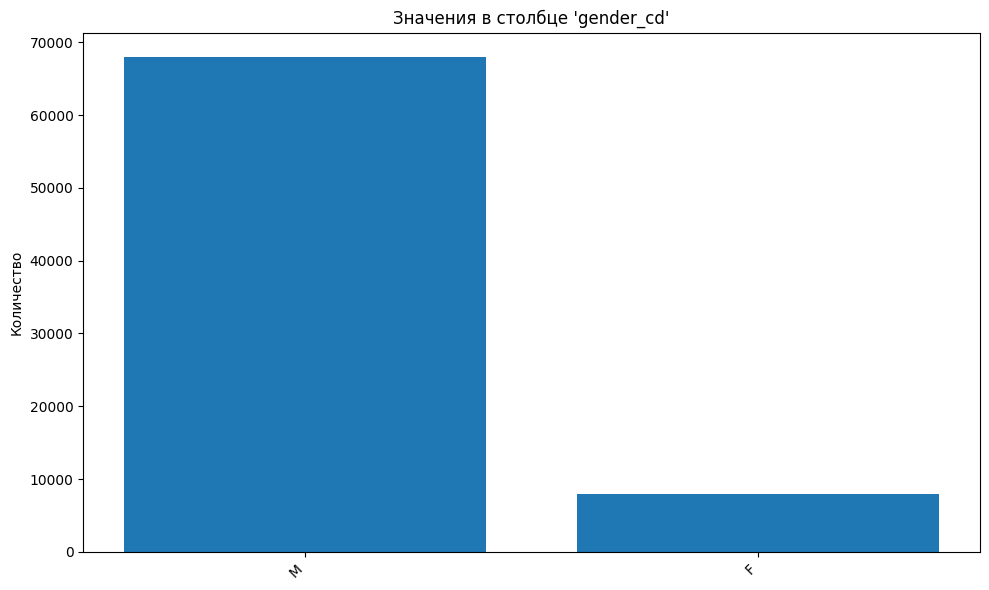

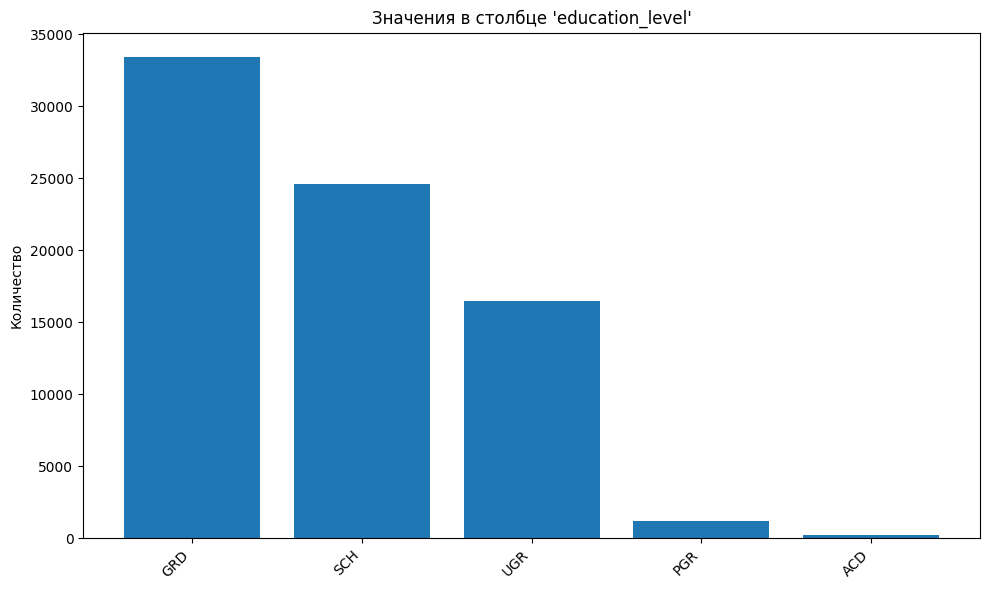

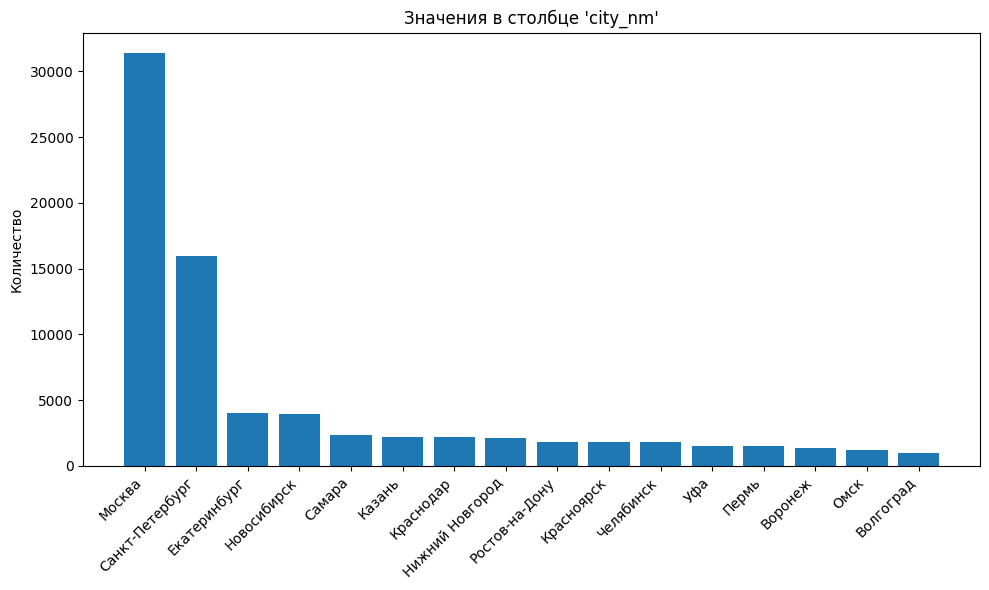

In [27]:
for col in categorical:
    counts = data[col].value_counts(dropna=False).reset_index()
    counts.columns = ['value', 'count']

    plt.figure(figsize=(10, 6))
    plot_data = counts
    title = f"Значения в столбце '{col}'"

    plt.bar(plot_data['value'].astype(str), plot_data['count'])
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Количество")
    plt.tight_layout()

    plt.savefig(f"{col}_value_plot.png", dpi=300)
    plt.show()

    counts.to_csv(f"{col}_value_counts.csv", index=False)

По графикам сразу можно заметить некоторые тенденции, например, что клиентов-мужчин гораздо больше, чем клиентов-женщин. Но пока не будем углубляться в выводы, сделаем это на следующем этапе работы.

Обработаем признак "Образование".

Построим графики для всех уровней образования (два высших и ученую степень объединим в одно)

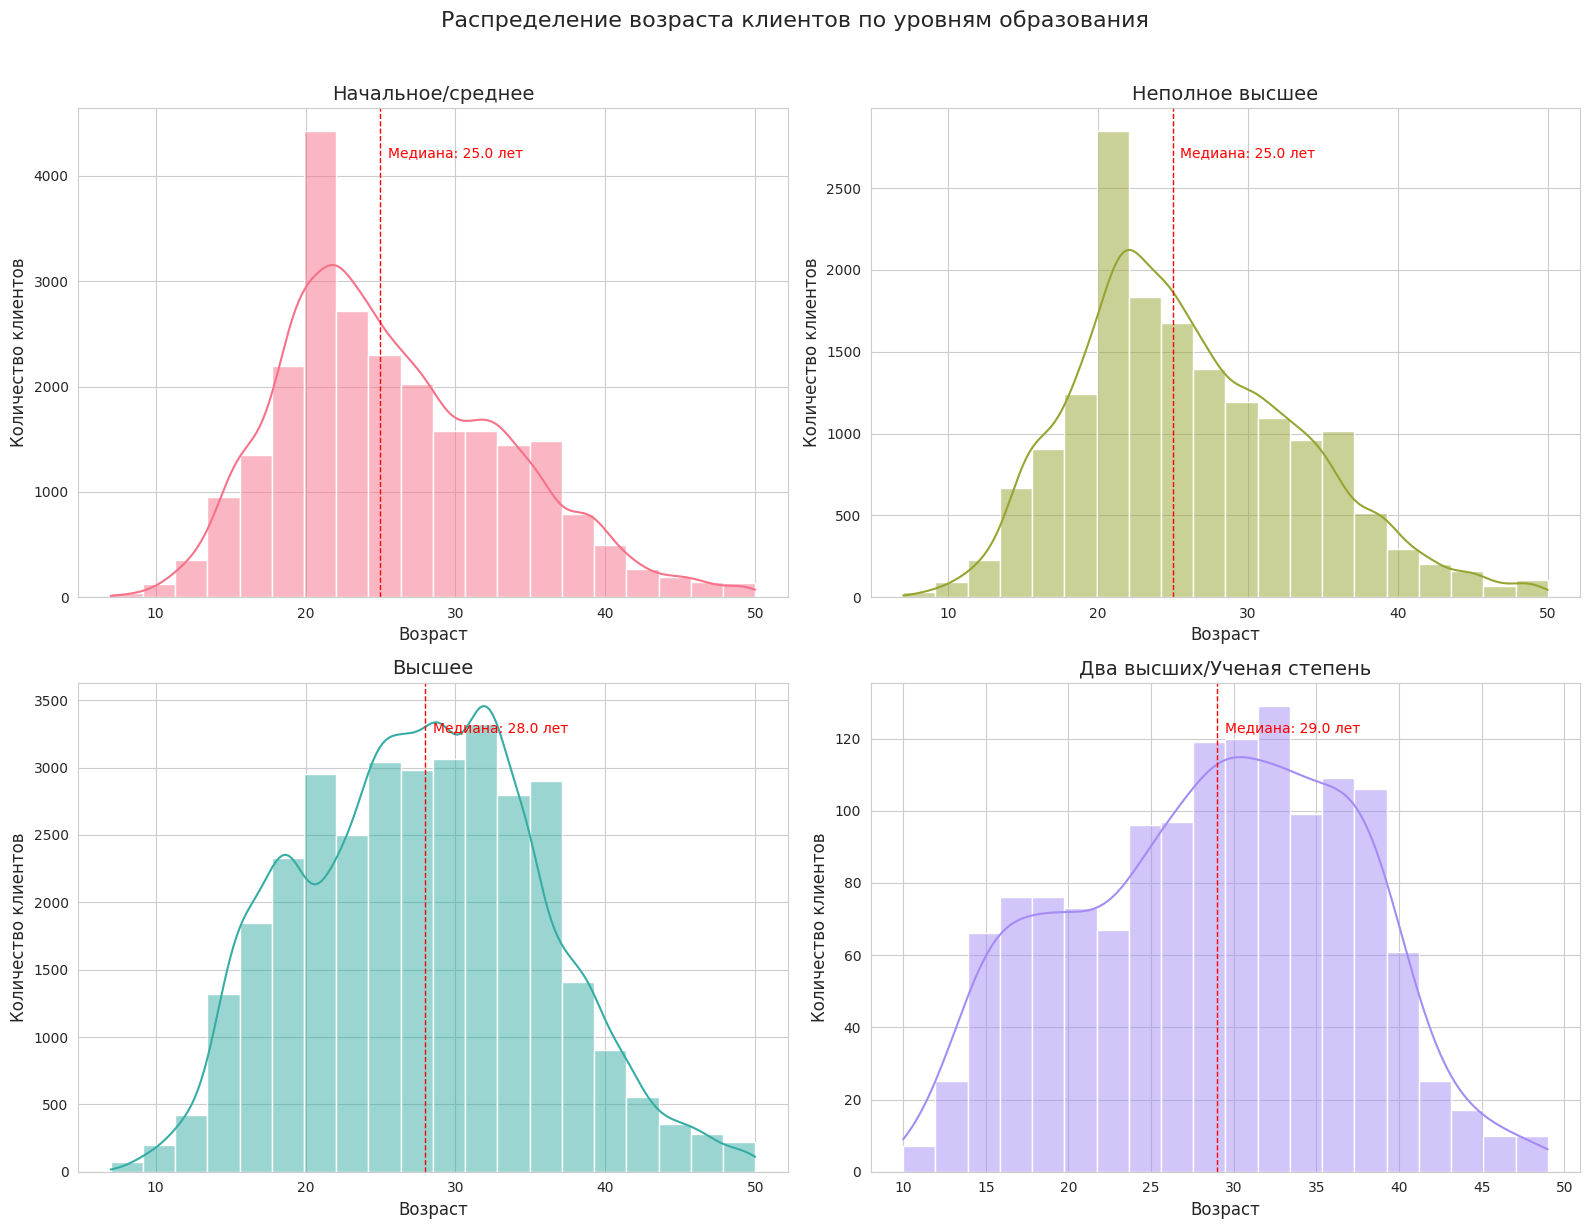

In [28]:
education_names = {
    'SCH': 'Начальное/среднее',
    'UGR': 'Неполное высшее',
    'GRD': 'Высшее',
    'PGR': 'Два высших/Ученая степень',
    'ACD': 'Два высших/Ученая степень'
}

plot_data = data.copy()
plot_data['education_plot'] = plot_data['education_level'].map(education_names)

education_order = [
    'Начальное/среднее',
    'Неполное высшее',
    'Высшее',
    'Два высших/Ученая степень'
]

plot_data = plot_data[plot_data['education_plot'].isin(education_order)]
plot_data['education_plot'] = pd.Categorical(
    plot_data['education_plot'],
    categories=education_order,
    ordered=True
)

sns.set_style("whitegrid")
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

n_levels = len(education_order)
n_cols = 2
n_rows = (n_levels + 1) // 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6*n_rows))
axes = axes.flatten()

palette = sns.color_palette("husl", n_levels)

for i, edu in enumerate(education_order):
    subset = plot_data[plot_data['education_plot'] == edu]

    sns.histplot(
        data=subset,
        x='age',
        bins=20,
        kde=True,
        color=palette[i],
        ax=axes[i]
    )

    axes[i].set_title(f"{edu}")
    axes[i].set_xlabel('Возраст')
    axes[i].set_ylabel('Количество клиентов')

    median_age = subset['age'].median()
    axes[i].axvline(median_age, color='red', linestyle='--', linewidth=1)
    axes[i].text(
        median_age+0.5, axes[i].get_ylim()[1]*0.9,
        f'Медиана: {median_age:.1f} лет',
        color='red'
    )

for j in range(n_levels, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Распределение возраста клиентов по уровням образования', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

Заметно, что в графиках присутствуют клиенты с несопоставимым возрасту уровнем образования. Например есть 87 людей в возрасте <18 лет имеют два высших образования или ученую степень.

Так как данные для датасета собирались в том числе из других сервисов Т-Банка,
вероятность того, что в записи будет правильный возраст выше, чем правильный
уровень образования.

Тогда, чтобы это исправить и оградить себя от неправильных выводов на основе
некорректных данных, рассчитаем минимальный возраст получения каждого из
уровней образований и присвоим клиентам подходящий уровень образования.

**Начальное/среднее образование** - нет ограничений (можно получить после 4
классов обучения)

**Неполное высшее** - 16 лет – поступление после 9 классов школы

**Высшее образование** - 22 год - в 18 лет оканчивает школу + 4 года бакалавриата

**2 высших** - 26 года - в 22 года первое высшее + 4 года бакалавриата

**Ученая степень** - 31 лет – 18 лет + 4 года бакалавриата + 2 магистратуры + 2
аспирантуры + 3 докторантуры.

In [29]:
education_min_age = {
    "SCH": 0,
    "UGR": 16,
    "GRD": 22,
    "PGR": 26,
    "ACD": 31
}


ordered_levels = ["ACD", "PGR", "GRD", "UGR", "SCH"]


def fix_education_level(row):
    actual_age = row["age"]
    claimed_level = row["education_level"]

    for level in ordered_levels:
        if actual_age >= education_min_age[level]:
            if ordered_levels.index(claimed_level) >= ordered_levels.index(level):
                return claimed_level
            else:
                return level
    return "SCH"

data["education_level"] = data.apply(fix_education_level, axis=1)


Построим новые графики распределения уровня образования по возрастам

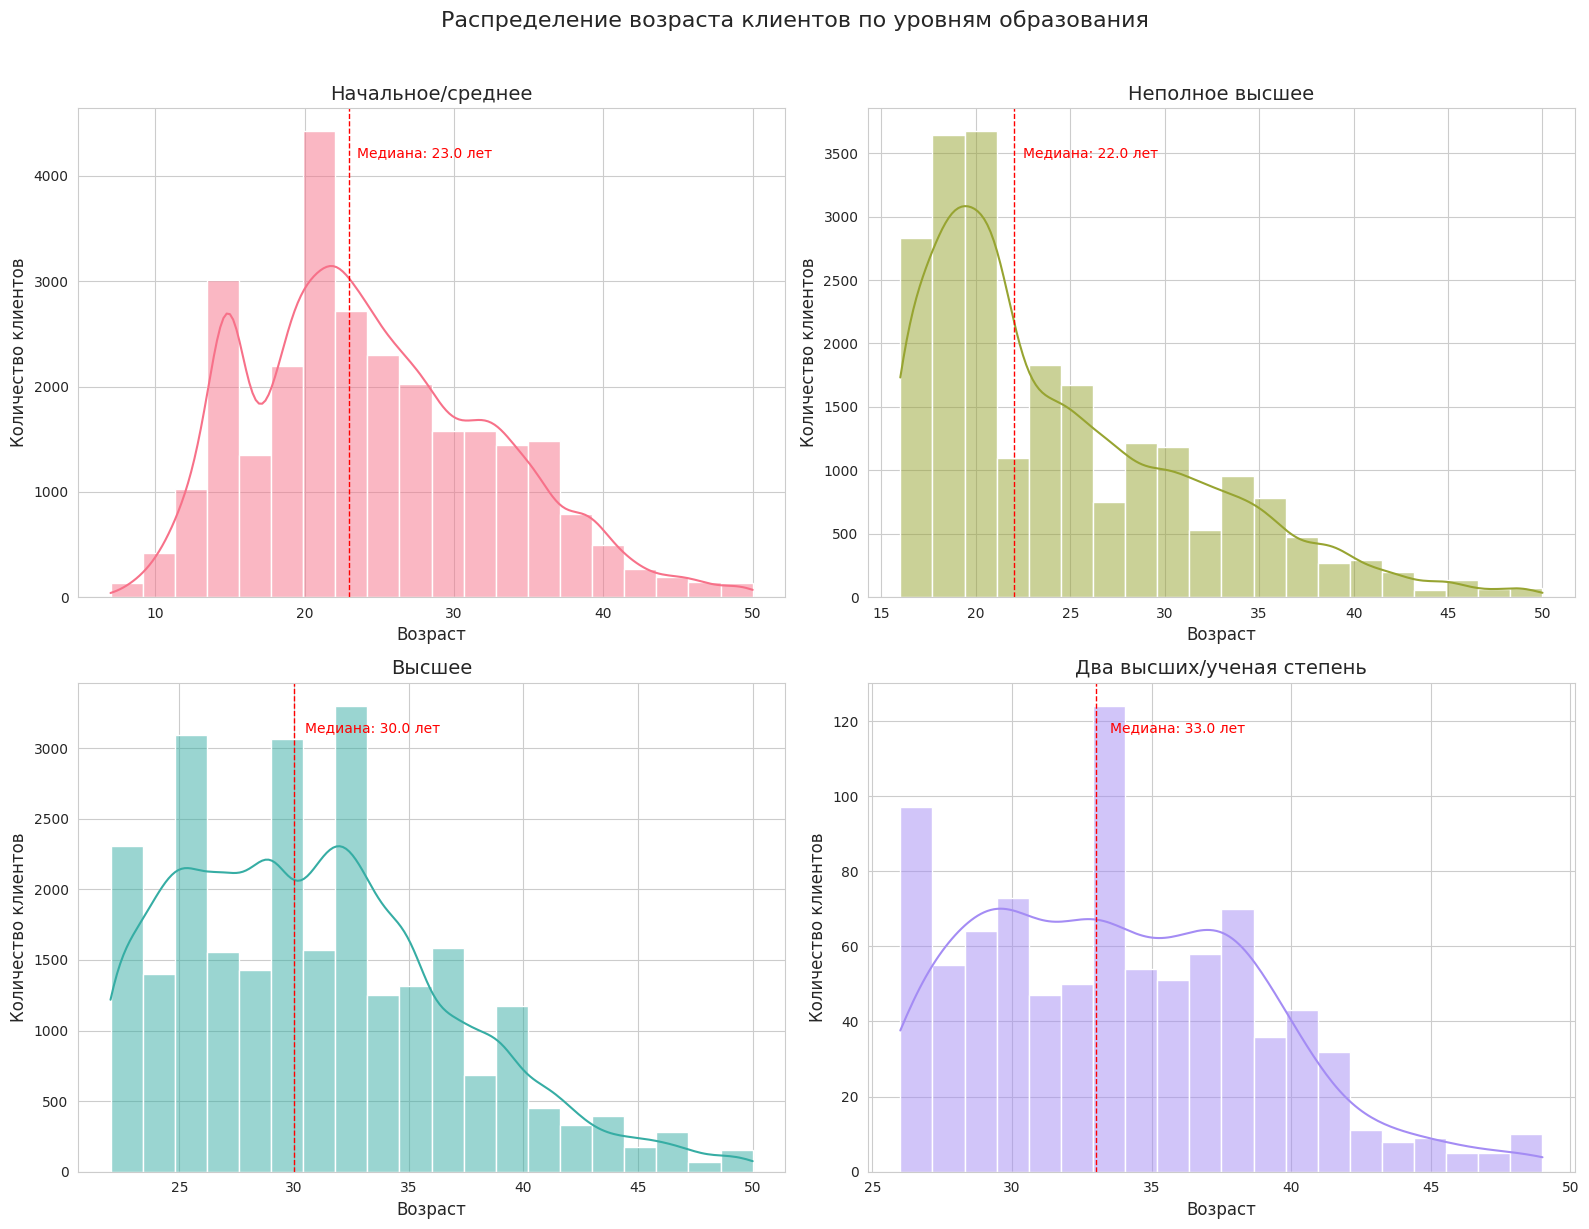

In [30]:
education_names = {
    'SCH': 'Начальное/среднее',
    'UGR': 'Неполное высшее',
    'GRD': 'Высшее',
    'PGR': 'Два высших/ученая степень',
    'ACD': 'Два высших/ученая степень'
}

plot_data = data.copy()
plot_data['education_plot'] = plot_data['education_level'].map(education_names)

education_order = [
    'Начальное/среднее',
    'Неполное высшее',
    'Высшее',
    'Два высших/ученая степень'
]

plot_data = plot_data[plot_data['education_plot'].isin(education_order)]
plot_data['education_plot'] = pd.Categorical(
    plot_data['education_plot'],
    categories=education_order,
    ordered=True
)

sns.set_style("whitegrid")
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

n_levels = len(education_order)
n_cols = 2
n_rows = (n_levels + 1) // 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 6*n_rows))
axes = axes.flatten()

palette = sns.color_palette("husl", n_levels)

for i, edu in enumerate(education_order):
    subset = plot_data[plot_data['education_plot'] == edu]

    sns.histplot(
        data=subset,
        x='age',
        bins=20,
        kde=True,
        color=palette[i],
        ax=axes[i]
    )

    axes[i].set_title(f"{edu}")
    axes[i].set_xlabel('Возраст')
    axes[i].set_ylabel('Количество клиентов')

    median_age = subset['age'].median()
    axes[i].axvline(median_age, color='red', linestyle='--', linewidth=1)
    axes[i].text(
        median_age+0.5, axes[i].get_ylim()[1]*0.9,
        f'Медиана: {median_age:.1f} лет',
        color='red'
    )

for j in range(n_levels, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Распределение возраста клиентов по уровням образования', y=1.02, fontsize=16)
plt.tight_layout()

plt.show()

Проверим наличие дубликатов покупок одной и той же игры конкретным
пользователем

In [31]:
duplicates = data.duplicated(subset=['client_id', 'good_id'], keep=False)

duplicate_purchases = data[duplicates].sort_values(['client_id', 'good_id'])

duplicate_stats = duplicate_purchases.groupby(['client_id', 'good_id']).agg(
    purchase_count=('good_id', 'count'),
    first_purchase_date=('order_day', 'min'),
    last_purchase_date=('order_day', 'max'),
    total_spent=('good_price', 'sum')
).reset_index()

print(f"Всего уникальных пар клиент-игра: {len(data[['client_id', 'good_id']].drop_duplicates())}")
print(f"Всего дубликатов покупок: {len(duplicate_stats)}")
print(f"Процент дубликатов: {len(duplicate_stats)/len(data[['client_id', 'good_id']].drop_duplicates()) * 100:.2f}%")

Всего уникальных пар клиент-игра: 71363
Всего дубликатов покупок: 2821
Процент дубликатов: 3.95%


Удалим такие дубликаты (пользователь может купить игру себе на аккаунт только один раз)

In [32]:
data = data.drop_duplicates(subset=['client_id', 'good_id'], keep='first')

**Интересный инсайт:** в данных есть люди, возраст которых измнился более чем на 2 года, хотя минимальная дата в датаесте 2022-02-07, а максимальная 2023-10-29. Изменения возраста более чем на 2 года не могло произойти.

Это повод сходить к датаинженерам и спросить, почему так просиходит. А пока просто не будем учитывать этих клиентов (всего 7 штук), чтобы получить более точную аналитику.

In [33]:
age_variation = data.groupby("client_id")["age"].agg(["min", "max"])

age_variation["diff"] = age_variation["max"] - age_variation["min"]

suspicious_clients = age_variation[age_variation["diff"] > 2].reset_index()

print(suspicious_clients)


     client_id  min  max  diff
0  5-2555FIVDL   23   36    13
1  5-2TYTYFEPZ   15   40    25
2  5-33JJOZPXT   19   39    20
3  5-37XHQTOF2   11   31    20
4  5-380J388JC   14   36    22
5  5-3AR746W4P   19   44    25
6   5-OJK098F3   21   35    14


Удаляем этих клиентов

In [34]:
bad_ids = age_variation[age_variation["diff"] > 2].index

data = data[~data["client_id"].isin(bad_ids)]

**4 этап**: Исследование и ответы на вопросы 1 задачи

Исследуем доход клиентов в зависимости от их возраста

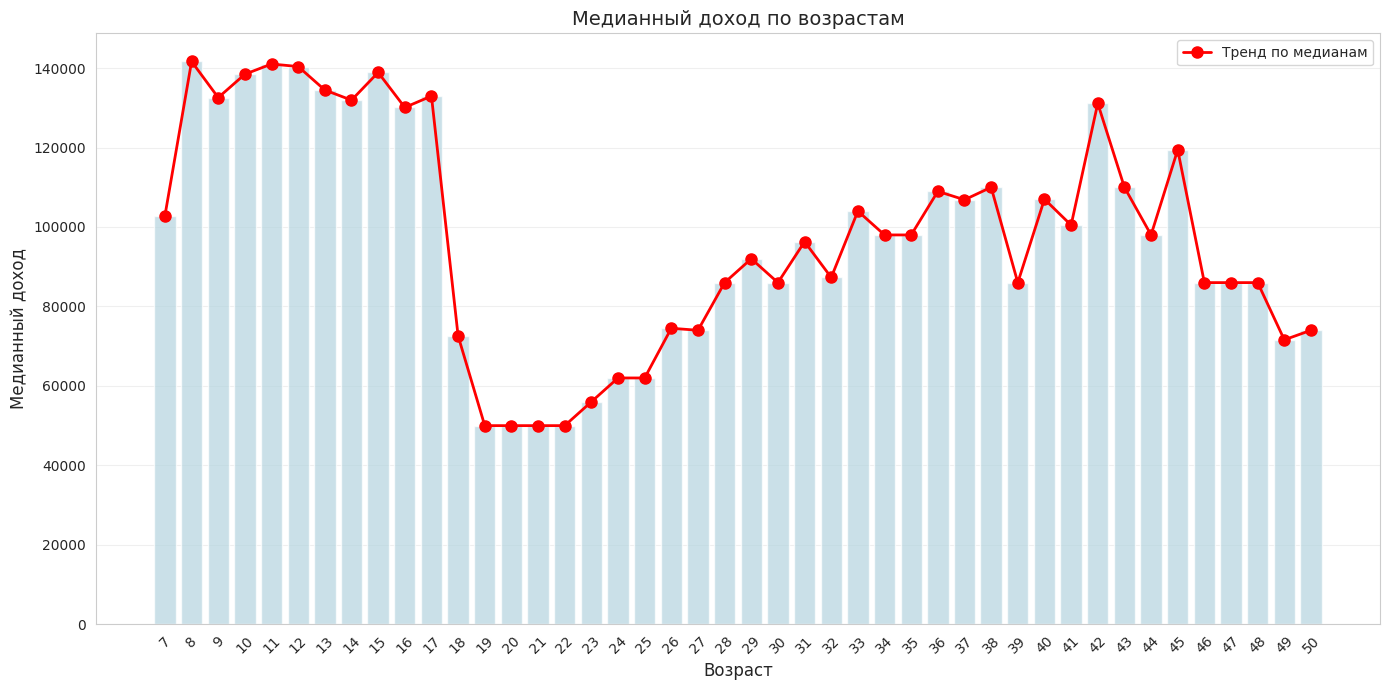

In [35]:
income_by_age = data.groupby('age')['monthly_income_amt'].median().reset_index()

plt.figure(figsize=(14, 7))

ax = sns.barplot(
    data=income_by_age,
    x='age',
    y='monthly_income_amt',
    color='lightblue',
    alpha=0.7
)

x_positions = [patch.get_x() + patch.get_width()/2 for patch in ax.patches]
y_values = [patch.get_height() for patch in ax.patches]

sorted_indices = np.argsort(x_positions)
x_sorted = np.array(x_positions)[sorted_indices]
y_sorted = np.array(y_values)[sorted_indices]

ax.plot(
    x_sorted,
    y_sorted,
    color='red',
    marker='o',
    markersize=8,
    linewidth=2,
    label='Тренд по медианам'
)

plt.title('Медианный доход по возрастам', fontsize=14)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Медианный доход', fontsize=12)
plt.xticks(rotation=45)
plt.legend()

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

По графику заметна интересная тенденция: у подростков 7-18 лет, которые, как правило, либо вовсе не работают, либо работают на низкооплачиваемых работах, доход больше, чем у людей среднего возраста.

Это можно объяснить тем, что у подростков совсем другой источник «дохода» (это не зарплата, а родительские переводы на карту), и их поведение при покупках игр будет отличаться и по объёму средств, и по характеру покупок.

Поэтому я принял решение использовать для анализа в одних случая (когда нас не интересует доход пользователей) все данные, а в других случаях (когда речь идет о доходе) анализировать две разные группы пользователей:

1. teens - пользователи 7-18 лет
2. adults - пользователи 19-50 лет

P.S. Кстати из этого графика можно вынести еще одну мысль (правда оффтоп) о том, что обычно карту Джуниор детям оформляют родители с большим средним доходом. Ведь родители обычно переводят на карту детей лишь небольшую часть денег и если в нашем случае это >100 000, то родители зарабатывают очень прилично. Если же расчет дохода по карте Джуниор ведется по привязанными картам родителей, то все равно можно заметить тенденцию, что у таких родителей доход выше, чем у остальных клиентов. ***Итого можно сформировать гипотезу и поделиться своими наблюдениями с ребятами, которые работают в команде карты Джуниор:*** *Карту Джуниор своим детям оформляют люди с доходом, превышающим средний доход остальных клиентов банка.*

In [36]:
teens = data[data['age'].between(7, 18)]
adults = data[data['age'].between(19, 50)]

Изучим затраты клиентов имеющих собственный доход (19-50 лет), на игры, относительно их дохода, с разбиением по возрасту

<ipython-input-37-28591a7fcd1c>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  client_spending = adults.groupby('client_id').apply(


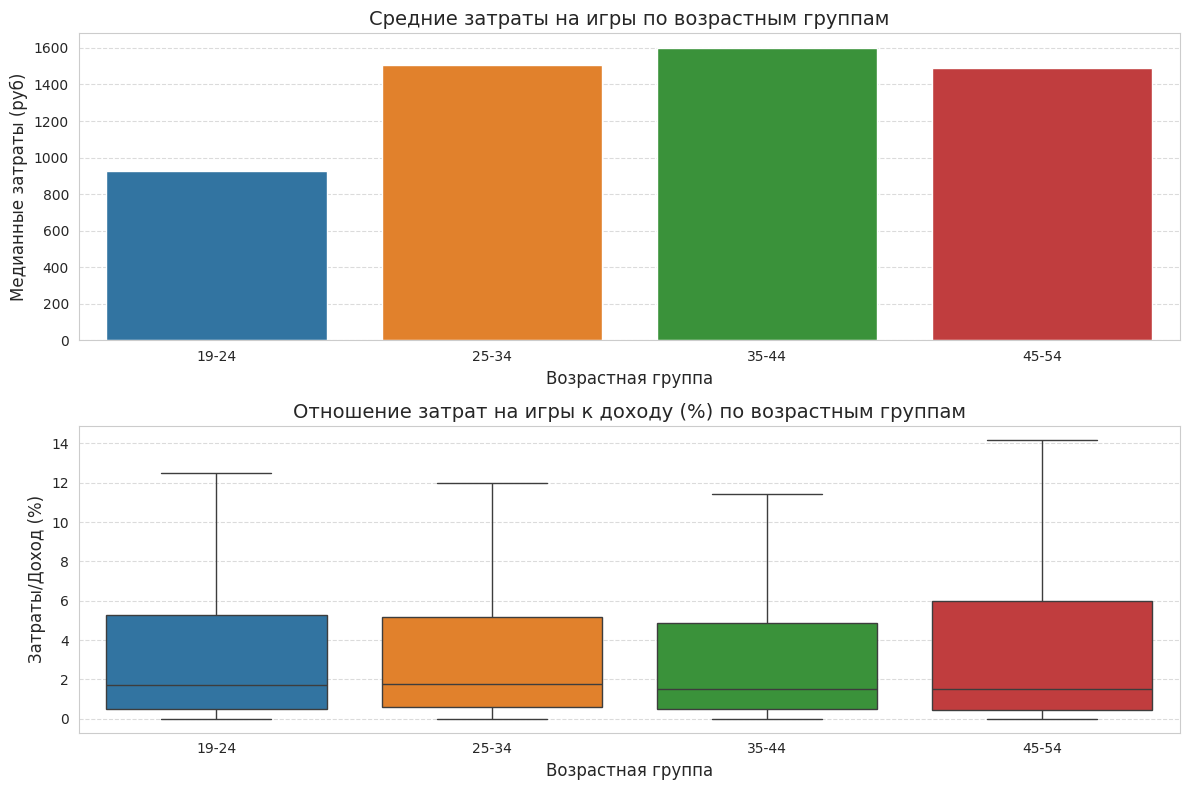

In [37]:
client_spending = adults.groupby('client_id').apply(
    lambda x: (x['good_price'] * x['good_cnt']).sum()
).reset_index(name='total_spending')

client_info = adults[['client_id', 'age', 'monthly_income_amt']]
merged_data = client_spending.merge(client_info, on='client_id', how='left')

age_bins = [19, 25, 35, 45, 55]
age_labels = ['19-24', '25-34', '35-44', '45-54']
merged_data['age_group'] = pd.cut(merged_data['age'], bins=age_bins, labels=age_labels, right=False)

merged_data['spending_ratio'] = (merged_data['total_spending'] / merged_data['monthly_income_amt']) * 100

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.barplot(
    data=merged_data,
    x='age_group',
    y='total_spending',
    estimator=np.median,
    errorbar=None,
    hue='age_group',
    legend=False
)
plt.title('Средние затраты на игры по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Медианные затраты (руб)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.subplot(2, 1, 2)
sns.boxplot(
    data=merged_data,
    x='age_group',
    y='spending_ratio',
    hue='age_group',
    legend=False,
    showfliers=False
)
plt.title('Отношение затрат на игры к доходу (%) по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Затраты/Доход (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

По графикам видим, что относительные затраты на игры к доходам пользователей в каждой из групп приблизительно равны и лежат в пределах 1-6%. В то же время видим, что абслютные затраты на игры больше у людей 30-40 лет. Это объясняется тем, что относительный процент примерно одинаковый, но зарплаты людей растут прямопропорционально их возрасту. Отсюда и появляется закономерность, что люди в возрасте 30-40 приносят нам больше денег.

**Вывод:** Группа пользователей, приносящая наибольший доход, состоит из людей в возрасте 30-40. Если мы хотим развивать приложение в сторону наиболее платежоспособной ЦА, то стоит ориентироваться именно на эту группу людей.

А теперь исследуем затраты подростков на покупки в Т-Игры. В данном случае относительная часть затрат к доходам нас не интересует, так как возможность трат зависит не только от них, но и от "согласия родителей".

<ipython-input-38-0678f9ddbbbd>:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  client_spending = teens.groupby('client_id').apply(


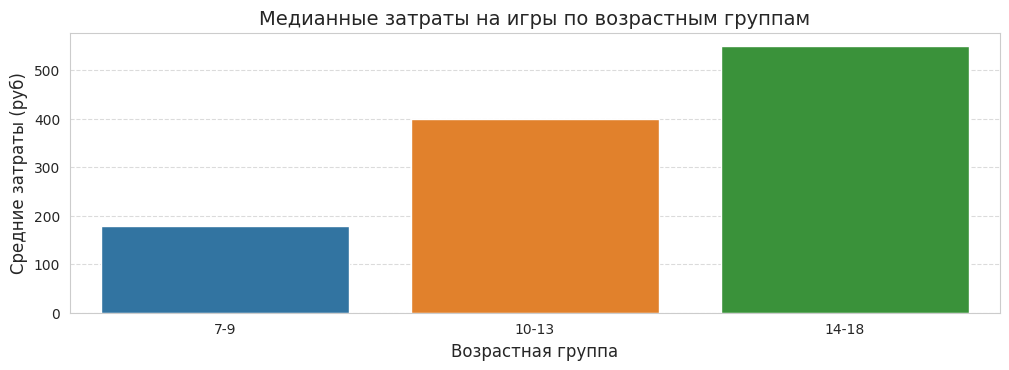

In [38]:
client_spending = teens.groupby('client_id').apply(
    lambda x: (x['good_price'] * x['good_cnt']).sum()
).reset_index(name='total_spending')

client_info = teens[['client_id', 'age', 'monthly_income_amt']]
merged_data = client_spending.merge(client_info, on='client_id', how='left')

age_bins = [7, 11, 15, 18]
age_labels = ['7-9','10-13','14-18']
merged_data['age_group'] = pd.cut(merged_data['age'], bins=age_bins, labels=age_labels, right=False)

merged_data['spending_ratio'] = (merged_data['total_spending'] / merged_data['monthly_income_amt']) * 100

plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
sns.barplot(
    data=merged_data,
    x='age_group',
    y='total_spending',
    estimator=np.median,
    errorbar=None,
    hue='age_group',
    legend=False
)
plt.title('Медианные затраты на игры по возрастным группам')
plt.xlabel('Возрастная группа')
plt.ylabel('Средние затраты (руб)')
plt.grid(axis='y', linestyle='--', alpha=0.7)

По графику видно, что больше всего денег на игры тратят ребята 14-18 лет. Действительно, в это время им открывается более простой доступ к деньгам (родители дают на карманные расходы чаще и больше, чем малышам), и часто деньги на обеды "превращаются" в деньги на компьютерные игры.

**Вывод:** Если мы хотим укрепиться на текущем рынке, то стоит развивать сервис (и рекламу) с ориентиром на возрастную группу 14-18 лет. Если же мы хотим выходить на новые рынки (7-12 лет), то нужно искать возможности для пиара в эту сторону, например закупить рекламу у инфлюенсиров этой аудитории (Влад А4, Мистер Макс и Мисс Китти и т.д.). Но в то же время проблема может быть не в отсутсвие пиара, а банально в том, что над маленькими детками у родителей более строгий контроль и потратить "карманные деньги" на игры им просто не разрешают.

Изучим корреляцию численных параметров

In [39]:
data['order_day'].max()

'2023-10-29'

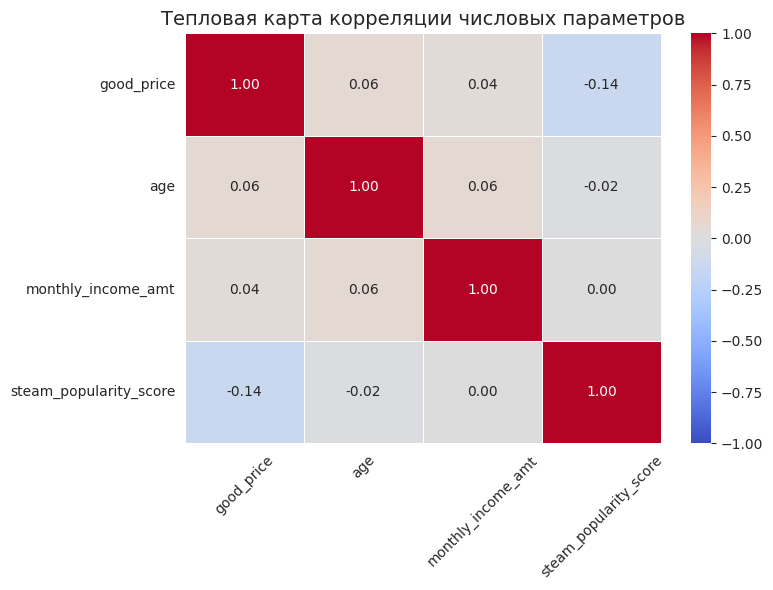

In [40]:
numerical = ['good_price', 'age', 'monthly_income_amt', 'steam_popularity_score']
numerical_data = data[numerical].copy()

plt.figure(figsize=(8, 6))
corr_matrix = numerical_data.corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,
    vmax=1
)
plt.title('Тепловая карта корреляции числовых параметров', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

По тепловой карте видно, что отличная от нуля корреляция есть только у рейтинга игры и ее цены (что логично)

Теперь проведем анализ для группы пользователей 19-50 лет

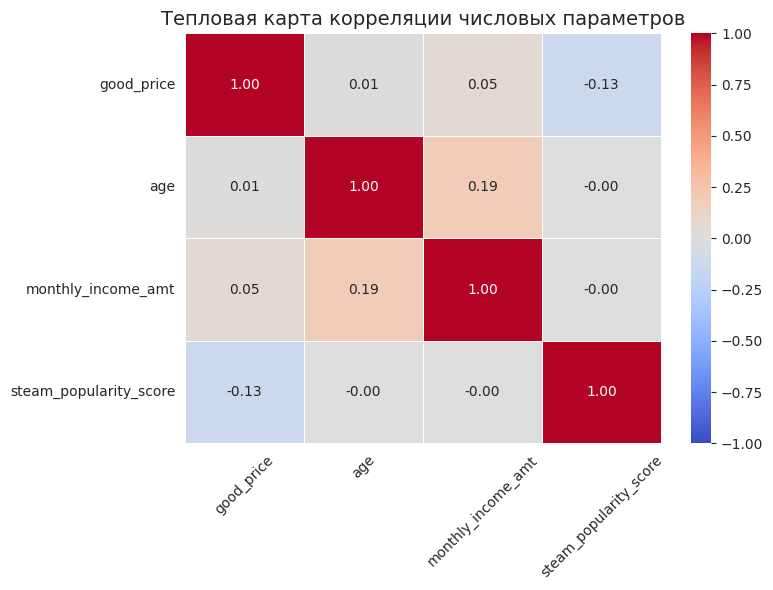

In [41]:
numerical = ['good_price', 'age', 'monthly_income_amt', 'steam_popularity_score']
numerical_data = adults[numerical].copy()

plt.figure(figsize=(8, 6))
corr_matrix = numerical_data.corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt=".2f",
    linewidths=0.5,
    vmin=-1,
    vmax=1
)
plt.title('Тепловая карта корреляции числовых параметров', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

На этой тепловой карте, помимо корреляции рейтинга и цены, есть также корреляция возраста и дохода. И эта корреляция подтвержадется графиками выше - чем старше человек, тем больше у него доход.

**1 Вопрос:** Как игроки отличаются от других клиентов Т-Банка?

Для ответа на этот вопрос сравним профиль пользователя-игрока из нашего датасета с данными по всем клиентам Т-Банка, которые можно найти в открытом доступе.

Исследуем демографические характеристики: возраст, пол, уровень дохода

In [42]:
#исследуем возраст клиентов
print('Медианный возраст клиента Т-Игр:', data['age'].median())

Медианный возраст клиента Т-Игр: 26.0


Из [статьи](https://altapress.ru/ekonomika/story/tinkoff-bank-smenil-nazvanie-na-t-bank-prichina-346526) за 2024 год мы узнаем, что средний возраст клиента Т-Бнка на тот момент - ***30 лет*** (примим, что в 2023 году было аналогично). **Тогда в среднем клиенты Т-Игр моложе остальных клиентов Т-Банка на 4 года. При создании чего-либо для Т-Игр (реклама, новый дизайн и т.д.) стоит таргетироваться на молодую аудиторию и ориентироваться на молодежные тренды.**

In [43]:
#исследуем процентное соотношение мужчин и женщин среди клиентов
print('Отношение мужчин и женщин среди клиентов Т-Игр')
print('Мужчин:', round(len(data[data['gender_cd'] == 'M']) / len(data), 2)*100, '%')
print('Женщин:', round(len(data[data['gender_cd'] == 'F']) / len(data), 2)*100, '%')

Отношение мужчин и женщин среди клиентов Т-Игр
Мужчин: 89.0 %
Женщин: 11.0 %


Из [исследования ВТБ](https://vrn.aif.ru/money/finance/issledovanie_banka_muzhchiny_tratyat_na_tret_bolshe_zhenshchin) за 2019 год можем узнать, что тогда процентное отношение мужчин к женщинам в банке ВТБ было 53% на 47%. Допускаем, что в Т-Банке процентаж такой же. А также допускаем, что к 2022-2023 годам количество женщин, открывших продукты банка, увеличилось (с учетом развития всех социальных движений за права женщин). С учетом обоснованных допущений можем сказать, что на 2022-2023 год процентное отношения клиентов Т-Банка среди мужчин и женщин практически равное: 51% и 49% соответственно.

Тогда делаем вывод: **Если у обычных клиентов Т-Банка разница в процентном соотношении между мужчинами и женщинами - 2%, то в сервисе Т-Игры - 78% в пользу мужского пола! Можем с уверенностью сказать о том, что основная целевая аудитория сервиса Т-Игры - мужчины. Они приносят наибольший доход**.

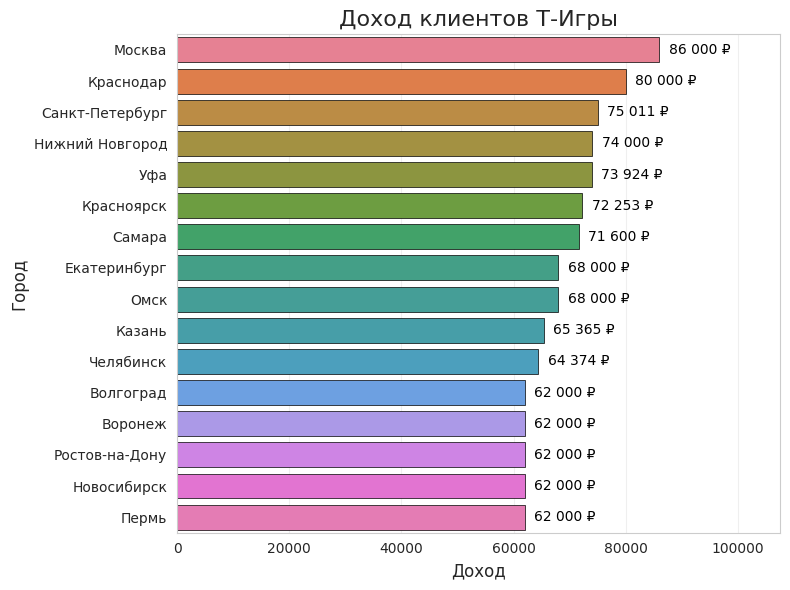


Доход клиентов Т-Игры:
        city_nm  monthly_income_amt
         Москва             86000.0
      Краснодар             80000.0
Санкт-Петербург             75011.0
Нижний Новгород             74000.0
            Уфа             73924.0
     Красноярск             72253.0
         Самара             71600.0
   Екатеринбург             68000.0
           Омск             68000.0
         Казань             65365.0
      Челябинск             64373.5
      Волгоград             62000.0
        Воронеж             62000.0
 Ростов-на-Дону             62000.0
    Новосибирск             62000.0
          Пермь             62000.0


In [44]:
# Исследуем доходы клиентов
avg_income_by_city = adults.groupby('city_nm')['monthly_income_amt'].median().round(2).reset_index()
avg_income_by_city = avg_income_by_city.sort_values(by='monthly_income_amt', ascending=False)

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")

barplot = sns.barplot(
    data=avg_income_by_city.head(20),
    x='monthly_income_amt',
    y='city_nm',
    legend=False,
    hue='city_nm',
    edgecolor='black',
    linewidth=0.5
)

for i, (value, city) in enumerate(zip(avg_income_by_city.head(20)['monthly_income_amt'],
                                    avg_income_by_city.head(20)['city_nm'])):
    formatted_value = f"{value:,.0f}".replace(",", " ")

    barplot.text(
        value + 0.02 * max(avg_income_by_city['monthly_income_amt']),
        i,
        f"{formatted_value} ₽",
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

plt.title('Доход клиентов Т-Игры', fontsize=16)
plt.xlabel('Доход', fontsize=12)
plt.ylabel('Город', fontsize=12)
plt.xlim(0, avg_income_by_city['monthly_income_amt'].max() * 1.25)

plt.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nДоход клиентов Т-Игры:")
print(avg_income_by_city.to_string(index=False))

Сравним медианные доходы клиентов Т-Игры и медианные доходы среднестатистического жителя России в разбивке по городам на 2023 год. Рассматриваем только клиентов Т-Игры в возрасте 19-50 лет (с собственным заработком).


> Почему мы берем статистику по среднестатистическому жителю России, а не по клиентам Т- Банка?

> ***Во-первых***, данных о доходах клиентов Т-Банка в открытом доступе нет.

> ***Во-вторых***, Т-Банк очень крупный банк, у него множество клиентов по всей России, и мы с большой долей вероятности можем сказать, что распределение доходов клиентов Т-Банка очень близко к распределению доходов населения России.

Рассмотрим медианную зарплату 5 городов из списка городов в датасете Т-Игр:


*   *Москва*. Медианная зп клиентов Т-Игр - **86000**. Медианная зп остальных клиентов Т-банка ~ **50000** ([брал отсюда](https://moskva.gorodrabot.ru/salaries?y=2023))
*   *Краснодар*. Медианная зп клиентов Т-Игр - **80000**. Медианная зп остальных клиентов Т-банка ~ **40000** ([брал отсюда](https://krasnodar.gorodrabot.ru/salaries?y=2023))
*   *Санкт-Петербург*. Медианная зп клиентов Т-Игр - **75011**. Медианная зп остальных клиентов Т-банка ~ **46000** ([брал отсюда](https://sankt-peterburg.gorodrabot.ru/salaries?y=2023))
*   *Омск*. Медианная зп клиентов Т-Игр - **68000**. Медианная зп остальных клиентов Т-банка ~ **34000** ([брал отсюда](https://omsk.gorodrabot.ru/salaries?y=2023))
*   *Ростов-на-Дону*. Медианная зп клиентов Т-Игр - **62000**. Медианная зп остальных клиентов Т-банка ~ **40000** ([брал отсюда](https://rostov-na-donu.gorodrabot.ru/salaries?y=2023))

Из приведенных примеров видно, что в **доход клиентов Т-Игр в среднем на 35-40% больше медианного дохода обычного клиента Т-Банка.**

**Стоит подумать о том, как через сервис Т-Игры переманивать "дорогих" пользователей в другие сервисы внутри желтого приложения.**

**Может быть при покупке игры предлагать пользователю доставку снэков и газировки через Т-Город?** Чтобы он мог сразу сесть за прохождение новой игры, не утруждая себя походами в магазин.


**Итоговый вывод по 1 Вопросу:**

*Как игроки отличаются от других клиентов Т-Банка?*

*   Клиенты Т-Игры в среднем на 4 года младше остальных клиентов Т-Банка
*   Среди клиентов Т-Игры ~90% составляют мужчины в отличие от обычных клиентов банка, распределение которых практически равное 50% - мужчины, 49% - девушки
*   Клиенты Т-Игр в среднем зарабатывают на 35-40% больше, чем остальные клиенты Т-Банка



**2 Вопрос:** Чем отличаются заядлые покупатели игр?

Для начала давайте определим, что означает "заядлые" покупатели игр. Заядлые, в данном случае, это те, кто совершили наибольшее количество покупок.

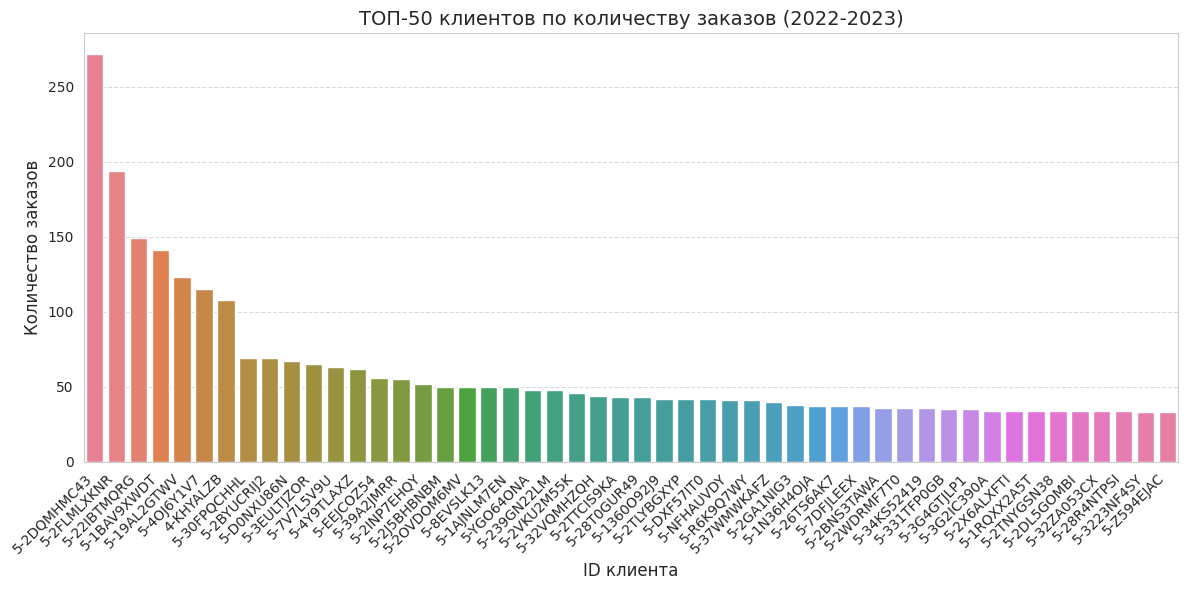

In [45]:
orders_per_client = data.groupby('client_id')['id'].nunique().reset_index()
orders_per_client.columns = ['client_id', 'order_count']

top_clients = orders_per_client.sort_values('order_count', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_clients.head(50),
    x='client_id',
    y='order_count',
    hue = 'client_id',
    legend=False
)
plt.title('ТОП-50 клиентов по количеству заказов (2022-2023)', fontsize=14)
plt.xlabel('ID клиента', fontsize=12)
plt.ylabel('Количество заказов', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

По графику видно, что у нас есть явный лидер среди заядлых геймеров: человек, совершивший 272 покупки. Далее количество покупок идет на спад и постепенно выравнивается. Для анализа особенностей заядлых пользователей возьмем 5% самых активных (в плане покупок) клиентов.

In [46]:
top_percent_count = int(len(top_clients) * 0.05)
top_percent_clients = top_clients.head(top_percent_count)
top_percent_clients

client_id  order_count
12145  5-2DQMHMC43          272
12663  5-2FLMLXKNR          194
8747   5-22IBTMQRG          149
4134   5-1BAV9XWDT          141
3378   5-19AL2GTWV          123
...            ...          ...
12068  5-2DIQHKADN            5
6507   5-1PEGLM5TI            5
6497   5-1PBVTZZHV            5
23129  5-32WAF2EU4            5
15211  5-2L9K4HEPS            5

[1832 rows x 2 columns]

Для ответа на вопрос задания сравним две группы пользователей: топ 5% самых заядлых игроков и всех остальных клиентов Т-Игры. Проведем анализ по разным признакам. Проверим статистическую значимость результатов с помощью критерия Манна-Уитни.

In [47]:
data["is_top_5_percent"] = data["client_id"].isin(top_percent_clients["client_id"])
adults = adults.copy()
adults["is_top_5_percent"] = adults["client_id"].isin(top_percent_clients["client_id"])

def compare_median_stat(df, col, group_col="is_top_5_percent"):
    group1 = df[df[group_col]][col]
    group2 = df[~df[group_col]][col]
    stat, p_value = mannwhitneyu(group1, group2, alternative='two-sided')
    return {
        "Медианное значение заядлых игроков": group1.median(),
        "Медианное значение остальных клиентов Т-Игры": group2.median(),
        "P_value": round(p_value, 4)
    }

age_comparison = compare_median_stat(data, "age")

income_comparison = compare_median_stat(adults, "monthly_income_amt")

data["order_sum"] = data["good_price"] * data["good_cnt"]
order_total = data.groupby(["client_id", "id"])["order_sum"].sum().reset_index()
avg_check = order_total.groupby("client_id")["order_sum"].median().reset_index()
avg_check = avg_check.merge(
    data[["client_id", "is_top_5_percent"]].drop_duplicates(), on="client_id"
)
avg_check_comparison = compare_median_stat(avg_check, "order_sum", "is_top_5_percent")

data['order_day'] = pd.to_datetime(data['order_day'], format='%Y-%m-%d')

data_sorted = data.sort_values(by=["client_id", "order_day"])

data_sorted["days_between"] = data_sorted.groupby("client_id")["order_day"].diff().dt.days

users_with_multiple_purchases = data_sorted.groupby("client_id").filter(lambda x: len(x) > 1)

days_gap_per_user = users_with_multiple_purchases.groupby("client_id")["days_between"].mean().reset_index()

days_gap_per_user = days_gap_per_user.merge(
    data[["client_id", "is_top_5_percent"]].drop_duplicates(),
    on="client_id"
)
days_between_comparison = compare_median_stat(days_gap_per_user, "days_between", "is_top_5_percent")

print("Медианный возраст:", age_comparison)
print("\nМедианный доход:", income_comparison)
print("\nСредний чек:", avg_check_comparison)
print("\nСреднее время между покупками", days_between_comparison)


Медианный возраст: {'Медианное значение заядлых игроков': 29.0, 'Медианное значение остальных клиентов Т-Игры': 25.0, 'P_value': np.float64(0.0)}

Медианный доход: {'Медианное значение заядлых игроков': 80000.0, 'Медианное значение остальных клиентов Т-Игры': 74000.0, 'P_value': np.float64(0.0)}

Средний чек: {'Медианное значение заядлых игроков': 259.0, 'Медианное значение остальных клиентов Т-Игры': 360.01, 'P_value': np.float64(0.0)}

Среднее время между покупками {'Медианное значение заядлых игроков': 23.732142857142858, 'Медианное значение остальных клиентов Т-Игры': 19.0, 'P_value': np.float64(0.1233)}


Выводы по результатам сделаем чуть позже, а перед этим сравним предпочтения по категориям игр заядлых игроков и всех остальных.

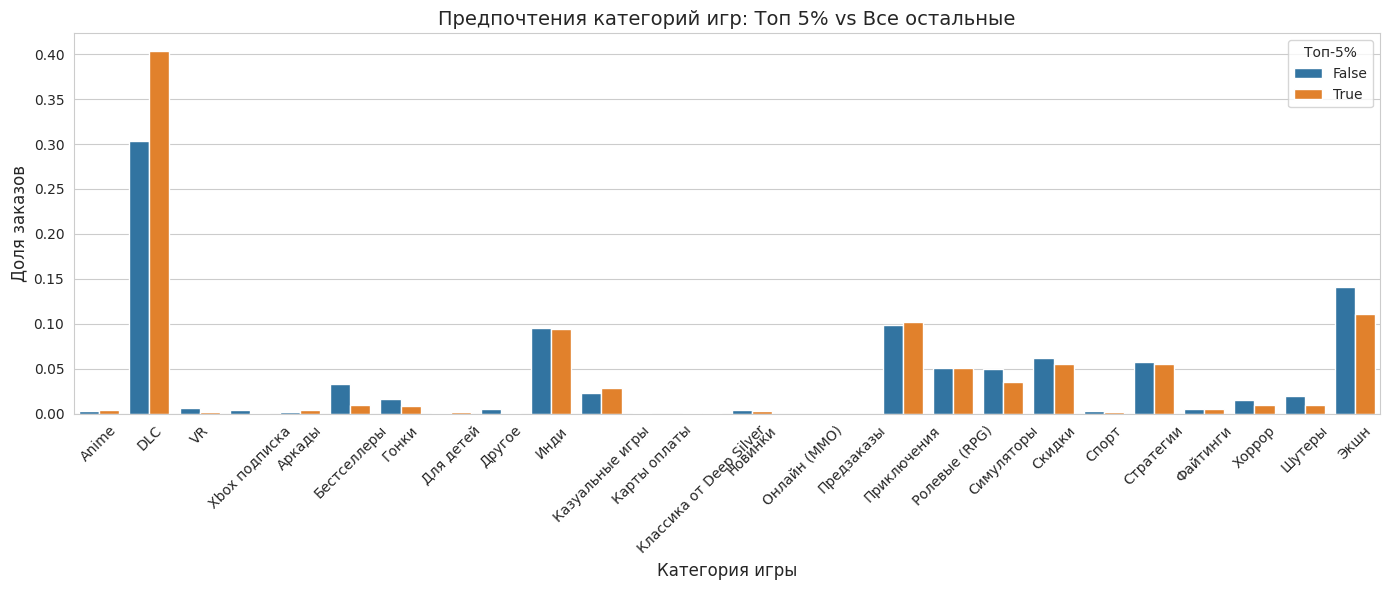

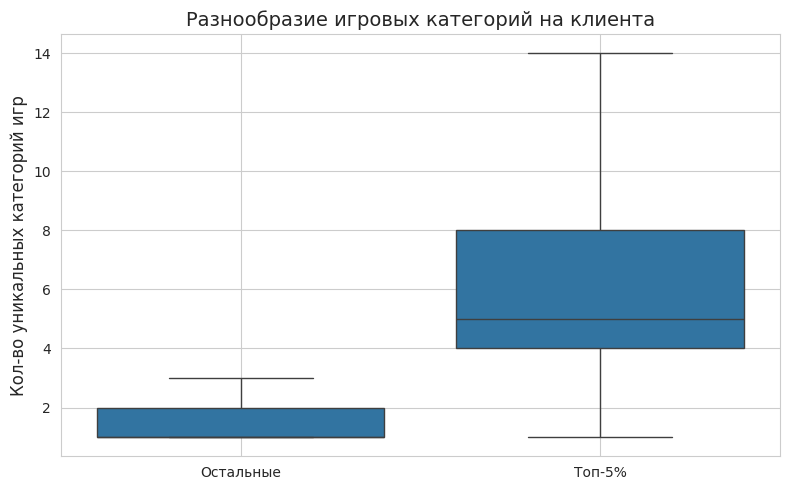

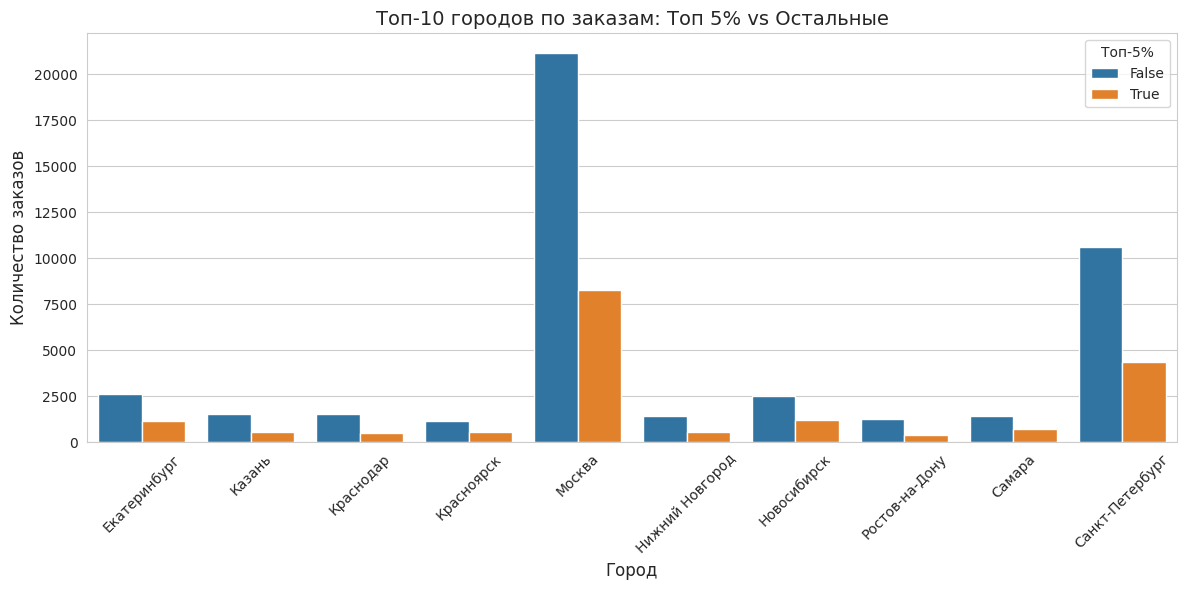

In [48]:
category_dist = data.groupby(["is_top_5_percent", "category_name"])["id"].count().reset_index()
category_dist.columns = ["is_top_5_percent", "category_name", "purchase_count"]

category_dist["group_total"] = category_dist.groupby("is_top_5_percent")["purchase_count"].transform("sum")
category_dist["share"] = category_dist["purchase_count"] / category_dist["group_total"]

plt.figure(figsize=(14, 6))
sns.barplot(data=category_dist, x="category_name", y="share", hue="is_top_5_percent")
plt.xticks(rotation=45)
plt.title("Предпочтения категорий игр: Топ 5% vs Все остальные")
plt.ylabel("Доля заказов")
plt.xlabel("Категория игры")
plt.legend(title="Топ-5%")
plt.tight_layout()
plt.show()

cat_diversity = data.groupby(["client_id"])["category_name"].nunique().reset_index()
cat_diversity.columns = ["client_id", "unique_categories"]
cat_diversity = cat_diversity.merge(data[["client_id", "is_top_5_percent"]], on="client_id")

plt.figure(figsize=(8, 5))
sns.boxplot(data=cat_diversity, x="is_top_5_percent", y="unique_categories", showfliers=False)
plt.title("Разнообразие игровых категорий на клиента")
plt.xticks([0, 1], ["Остальные", "Топ-5%"])
plt.ylabel("Кол-во уникальных категорий игр")
plt.xlabel("")
plt.grid(True)
plt.tight_layout()
plt.show()

city_dist = data.groupby(["is_top_5_percent", "city_nm"])["id"].count().reset_index()
city_dist.columns = ["is_top_5_percent", "city_nm", "purchase_count"]

top_cities = city_dist.groupby("city_nm")["purchase_count"].sum().nlargest(10).index
city_dist_top = city_dist[city_dist["city_nm"].isin(top_cities)]

plt.figure(figsize=(12, 6))
sns.barplot(data=city_dist_top, x="city_nm", y="purchase_count", hue="is_top_5_percent")
plt.title("Топ-10 городов по заказам: Топ 5% vs Остальные")
plt.xticks(rotation=45)
plt.ylabel("Количество заказов")
plt.xlabel("Город")
plt.legend(title="Топ-5%")
plt.tight_layout()
plt.show()

**Анализ результатов и итоговый вывод по 2 Вопросу:**

*Чем отличаются заядлые покупатели игр?*
1. ***Медианный возраст заядлых игроков на 4 года больше медианного возраста остальных пользователей***. Это объясняется тем, что подростки чаще всего покупают игры в жанре онлайн (Counter-Strike, PUBG и т.д.) и проводят в них долгое время, не нуждаясь в новых играх. Более взрослая аудитория обычно предпочитает сингл-плееры (Ведьмак, CyberPunk и другие "проходилки") и как только они заканчивают одну игру, они идут покупать новую, поэтому количество покупок, совершенных людьми более старшего возраста, больше, чем количество покупок у подростков.
2. ***Медианный доход заядлых игроков на 4000 больше медианного дохода остальных клиентов*** (анализ был проведен только по взрослой аудитории пользователей, имеющих личный доход). Этот результат напрямую коррелирует с тем, что в среднем заядлые покупатели старше остальных клиентов (а как мы знаем из анализа выше, зарплата растет пропорционально возрасту человека).
3. ***Средний чек покупок у заядлых игроков на ~100 рублей ниже, чем у остальных клиентов***. Этот результат можно объяснить тем, что заядлые игроки часто докупают дополнения к уже купленным играм. Дополнения часто дешевле, чем сама игра. Тем самым, редкие покупки "НЕ  заядлых игроков" в среднем дороже, чем покупки самых активных геймеров.
4. Тест на сравнение среднего время между покупками у заядлых игроков и у остальных показал результат p_value = 0.12 (при уровне значимости a = 0.05). Это означает, что мы не отвергаем нулевую гипотезу и не можем утверждать, что среднее время между покупками в двух исследуемых группах клиентов различны.
5. По графику предпочтения категорий игр видно, что ***единственная категория, в которой заядлые игроки по покупкам значительно опережают остальных клиентов, является категория DLC*** (дополнительного игрового контента). Это дополнительно подтверждает идею, высказанную в п.3.
6. ***Заядлые игроки более разнообразны в выборе категорий покупаемых игр (в среднем 4-8 разных категорий) по сравнению с остальными пользователями (в среднем 1-2 категории).*** Это объясняется тем, что заядлые игроки предпочитает сингл-плееры (Ведьмак, CyberPunk и другие "проходилки"), а они чаще всего выходят в разных жанрах. Остальные же клиенты чаще играют в одну категорию - онлайн-игры.
7. ***Заядлые игроки равномерно распределены по городам (относительно количество клиентов в городах).*** В каждом из городов процент заядлых игроков от всех пользователей ~ 20-30%


**3 Вопрос:** Нацелены ли игры на разные аудитории? То есть, можно ли выделить несколько групп игр, покупатели которых сильно отличаются друг от друга?

Для начала точнее определим, что значит "игры нацелены на разные аудитории".

Это значит, что:


*   Разные категории игр (например, Симуляторы, VR, Гонки) покупают разные группы клиентов
*   У этих групп различия по возрасту, доходу, полу и т.д.



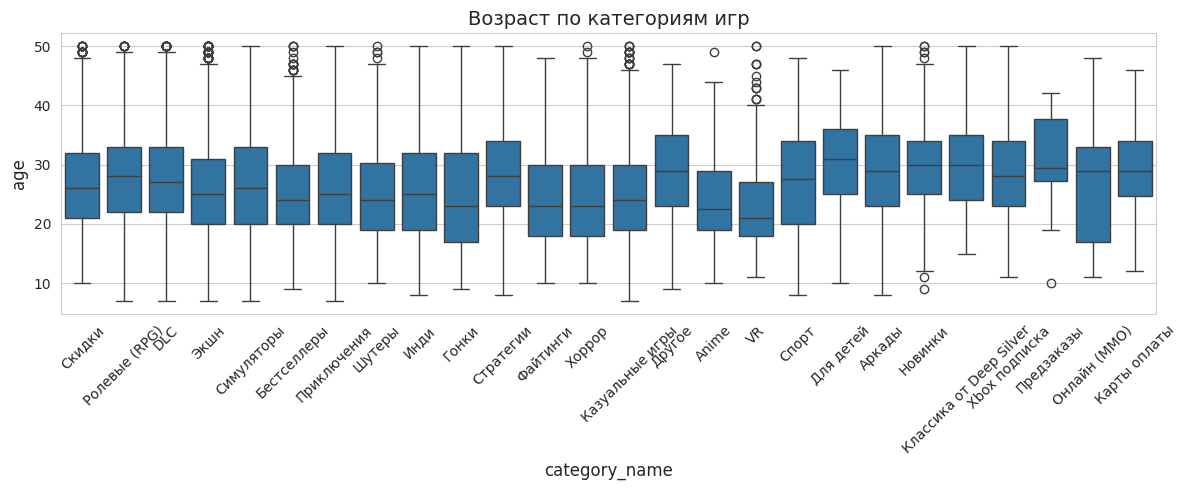

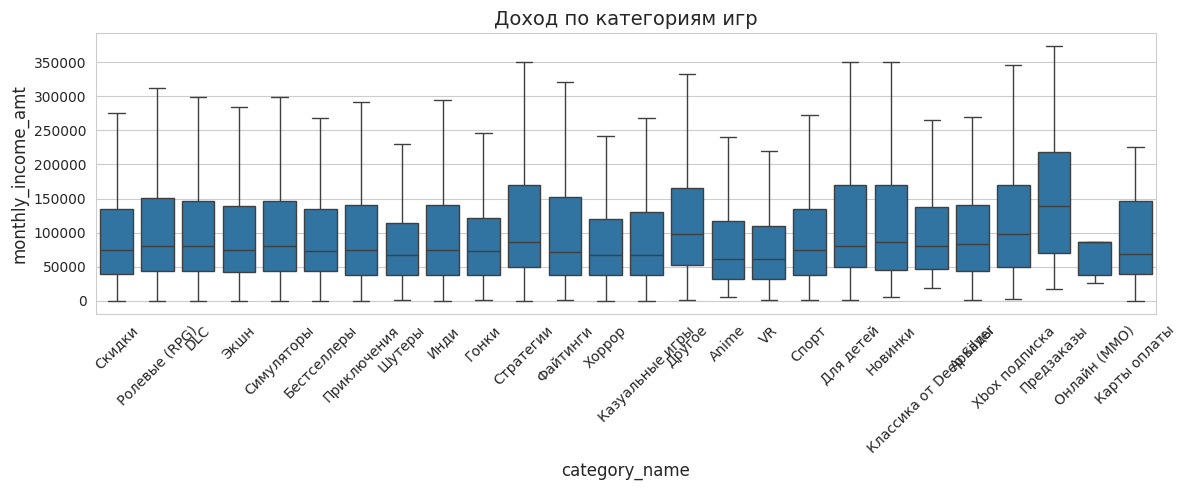

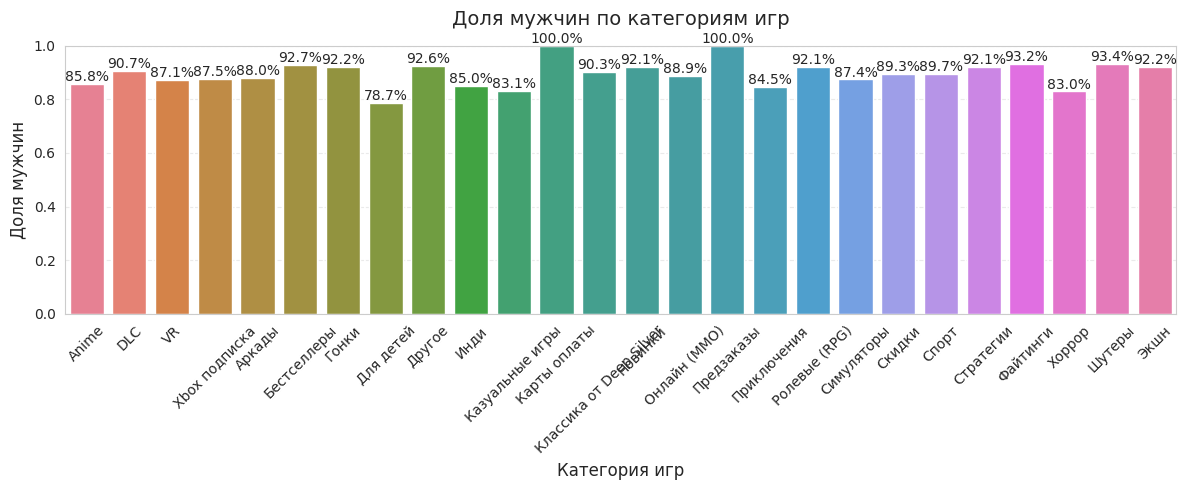

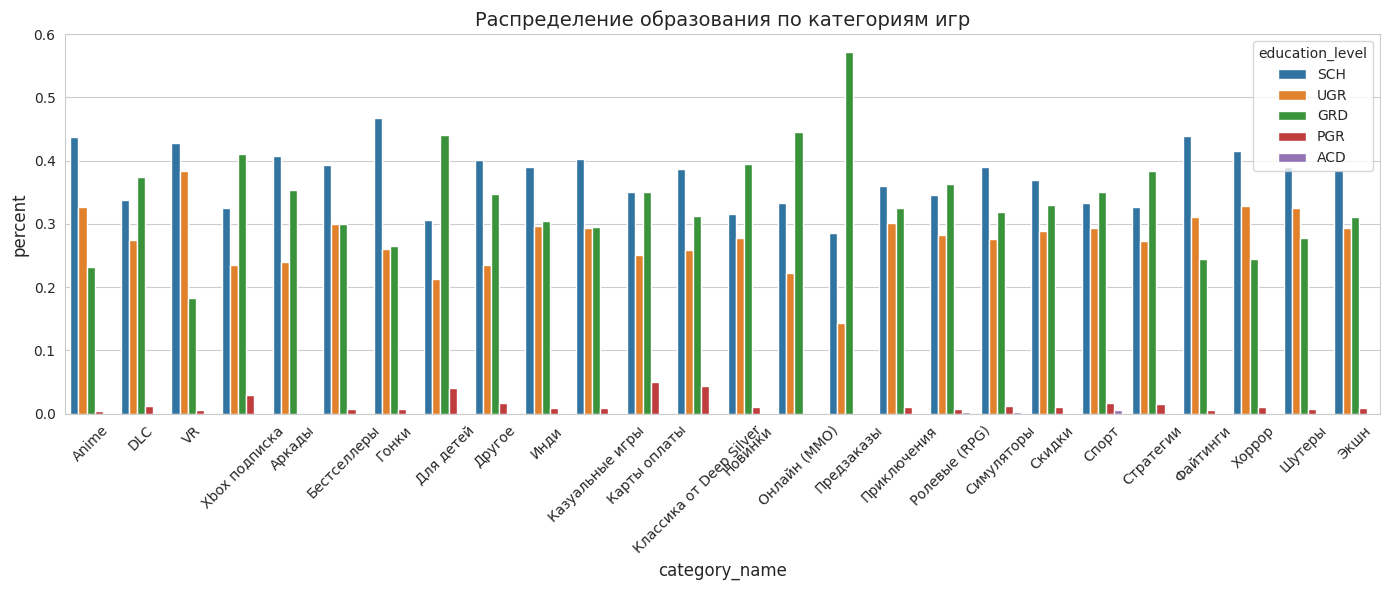


Итоговый профиль среднестатистического клиента по категориям игр


category_name   age  male_share  unique_clients    avg_check  \
0                     Anime  22.5    0.858268             238   303.571614   
1                       DLC  27.0    0.907437           13317   605.406052   
2                        VR  21.0    0.871233             362    64.548192   
3             Xbox подписка  28.0    0.875000             191  1617.480000   
4                    Аркады  29.0    0.880240             154   196.145509   
5               Бестселлеры  24.0    0.927350            1812  1351.035454   
6                     Гонки  23.0    0.922388             952   139.832905   
7                 Для детей  31.0    0.786667              70   321.264267   
8                    Другое  29.0    0.925926             269  1774.112458   
9                      Инди  25.0    0.849778            5471   262.558113   
10          Казуальные игры  24.0    0.830787            1461   147.904041   
11             Карты оплаты  29.0    1.000000              19  2271.117500   
12  Классика от Deep Silver  30.0    0.903226              92   465.361398   
13                  Новинки  30.0    0.921053             262  1646.433045   
14             Онлайн (MMO)  29.0    0.888889               9   203.744444   
15               Предзаказы  29.5    1.000000              14  1703.775714   
16              Приключения  25.0    0.844983            5593   429.570754   
17            Ролевые (RPG)  28.0    0.921284            3140   947.837244   
18               Симуляторы  26.0    0.874467            2990   403.888684   
19                   Скидки  26.0    0.893190            3749   445.582111   
20                    Спорт  27.5    0.896552             172   409.370977   
21                Стратегии  28.0    0.920572            3434   541.671179   
22                 Файтинги  23.0    0.931624             332   577.665071   
23                   Хоррор  23.0    0.829637             942   282.071341   
24                   Шутеры  24.0    0.933555            1150   443.643571   
25                     Экшн  25.0    0.921506            7710   829.033886   

         ACD       GRD       PGR       SCH       UGR  
0   0.000000  0.232283  0.003937  0.437008  0.326772  
1   0.001523  0.373720  0.012141  0.337507  0.275108  
2   0.000000  0.183562  0.005479  0.427397  0.383562  
3   0.000000  0.410000  0.030000  0.325000  0.235000  
4   0.000000  0.353293  0.000000  0.407186  0.239521  
5   0.000534  0.299145  0.008013  0.393162  0.299145  
6   0.000000  0.265672  0.007960  0.466667  0.259701  
7   0.000000  0.440000  0.040000  0.306667  0.213333  
8   0.000000  0.346801  0.016835  0.400673  0.235690  
9   0.001481  0.304741  0.008296  0.389481  0.296000  
10  0.000000  0.294284  0.009621  0.402943  0.293152  
11  0.000000  0.350000  0.050000  0.350000  0.250000  
12  0.000000  0.311828  0.043011  0.387097  0.258065  
13  0.000000  0.394737  0.011278  0.315789  0.278195  
14  0.000000  0.444444  0.000000  0.333333  0.222222  
15  0.000000  0.571429  0.000000  0.285714  0.142857  
16  0.001268  0.325676  0.011133  0.360485  0.301437  
17  0.001920  0.362315  0.007954  0.346133  0.281679  
18  0.002133  0.318099  0.012797  0.390615  0.276356  
19  0.000933  0.330224  0.010494  0.368937  0.289412  
20  0.005747  0.350575  0.017241  0.333333  0.293103  
21  0.001480  0.383078  0.016034  0.326591  0.272817  
22  0.000000  0.245014  0.005698  0.438746  0.310541  
23  0.001008  0.244960  0.010081  0.415323  0.328629  
24  0.000000  0.277409  0.007475  0.390365  0.324751  
25  0.001481  0.310801  0.008251  0.385592  0.293875

In [49]:
category_profiles = data.groupby("category_name").agg({
    "age": "median",
    "gender_cd": lambda x: (x == "M").mean(),
    "client_id": "nunique"
}).rename(columns={"gender_cd": "male_share", "client_id": "unique_clients"}).reset_index()

data["order_sum"] = data["good_price"] * data["good_cnt"]
avg_check = data.groupby("category_name")["order_sum"].mean().reset_index().rename(columns={"order_sum": "avg_check"})
category_profiles = category_profiles.merge(avg_check, on="category_name", how="left")

edu_levels = ["SCH", "UGR", "GRD", "PGR", "ACD"]
edu_dist = data.pivot_table(index="category_name", columns="education_level", values="client_id",
                            aggfunc="count", fill_value=0)

edu_dist_percent = edu_dist.div(edu_dist.sum(axis=1), axis=0).reset_index()
edu_dist_percent.columns.name = None

category_profiles = category_profiles.merge(edu_dist_percent, on="category_name", how="left")

plt.figure(figsize=(12, 5))
sns.boxplot(data=data, x="category_name", y="age")
plt.xticks(rotation=45)
plt.title("Возраст по категориям игр")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=adults, x="category_name", y="monthly_income_amt", showfliers=False)
plt.xticks(rotation=45)
plt.title("Доход по категориям игр")
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
ax = sns.barplot(data=category_profiles, x="category_name", y="male_share", hue="category_name", legend=False)
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1%}",
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points',
                fontsize=10)

plt.xticks(rotation=45)
plt.title("Доля мужчин по категориям игр", fontsize=14, pad=15)
plt.xlabel("Категория игр", fontsize=12)
plt.ylabel("Доля мужчин", fontsize=12)
plt.ylim(0, 1)

ax.yaxis.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

edu_plot = pd.melt(edu_dist_percent, id_vars="category_name", value_vars=edu_levels,
                   var_name="education_level", value_name="percent")

plt.figure(figsize=(14, 6))
sns.barplot(data=edu_plot, x="category_name", y="percent", hue="education_level")
plt.xticks(rotation=45)
plt.title("Распределение образования по категориям игр")
plt.tight_layout()
plt.show()

print('\nИтоговый профиль среднестатистического клиента по категориям игр')
category_profiles


                         Обычные пользователи (%)  Заядлые игроки (%)
category_name                                                        
Аркады                                      59.74               40.26
Для детей                                   61.43               38.57
Anime                                       67.65               32.35
Классика от Deep Silver                     73.91               26.09
Файтинги                                    74.10               25.90
Казуальные игры                             78.44               21.56
Предзаказы                                  78.57               21.43
Спорт                                       79.07               20.93
Ролевые (RPG)                               79.90               20.10
Новинки                                     80.53               19.47
Стратегии                                   80.90               19.10
Скидки                                      81.49               18.51
Хоррор              

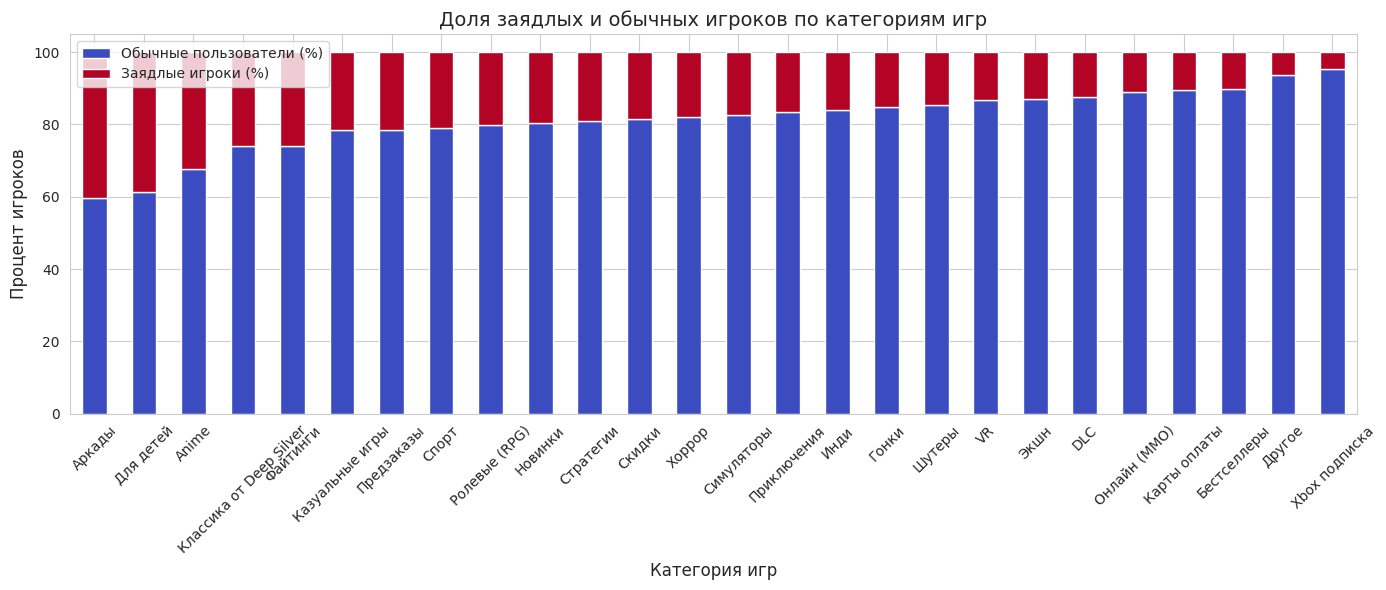

In [50]:
category_loyalty = data.groupby(["category_name", "is_top_5_percent"])["client_id"].nunique().reset_index()
category_loyalty.columns = ["category_name", "is_top_5_percent", "unique_clients"]

total_by_category = category_loyalty.groupby("category_name")["unique_clients"].sum().reset_index()
total_by_category.columns = ["category_name", "total_clients"]

category_loyalty = category_loyalty.merge(total_by_category, on="category_name")
category_loyalty["percent"] = round(category_loyalty["unique_clients"] / category_loyalty["total_clients"] * 100, 2)

loyalty_pivot = category_loyalty.pivot(index="category_name", columns="is_top_5_percent", values="percent").fillna(0)
loyalty_pivot.columns = ["Обычные пользователи (%)", "Заядлые игроки (%)"]
loyalty_pivot = loyalty_pivot.sort_values("Заядлые игроки (%)", ascending=False)

print(loyalty_pivot)

loyalty_pivot.plot(kind="bar", stacked=True, figsize=(14, 6), colormap="coolwarm")
plt.title("Доля заядлых и обычных игроков по категориям игр")
plt.ylabel("Процент игроков")
plt.xlabel("Категория игр")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Итоговый вывод по 3 Вопросу:**

*Нацелены ли игры на разные аудитории? То есть, можно ли выделить несколько групп игр, покупатели которых сильно отличаются друг от друга?*

*  По возрасту можно выделить 3 категории игр, которые нацелены на более старшую аудиторию (28+ лет): ***Стратегии, Аркады, Классика от Deep Silver.*** У молодой аудитории (16+ лет) наиболее популярны игры в жанре ***Онлайн(ММО)***.
И **интересный инсайт**: игры в категории "Для детей", исходя из данных датасета, чаще всего покупает взрослая аудитория (28+ лет). Это объясняется тем, что клиенты-родители, покупают своим маленьким детям игры. Важно обратить на это внимание и не сделать ложный вывод о том, что взрослые клиенты почему-то любят играть в игры "Для детей".
* По уровню дохода можно выделить три категории, в которых преобладают клиенты с большим средних доходом: ***Стратегии, Новинки, Предзаказы***. Эти категории любят люди старшего возраста (из п.1), а значит их доходы в среднем больше (из исследований выше: чем старше -> тем больше доход). ***Онлайн (ММО)***, в подтверждение слов о том, что категория популярна у более молодого поколения, имеет клиентов с наименьшим средним доходом. *Исследование было проведено на основе данных о самостоятельно обеспечивающих себя клиентов (19-50 лет).*
* Как мы уже выяснили раннее 89% процентов пользователей сервиса Т-Игры - мужчины. С учетом этого будет полезно рассмотреть категории, в которых процент мужчин менее 86%. Это такие категории как ***Для детей, Anime, Хорроры, Казуальные игры***. Если мы захотим сделать какую-нибудь акцию, нацеленную на женскую аудиторию (например, к 8 марта), то стоит поработать именно с этими категориями игр.
* Заядлые игроки чаще всего выбирают ***Аркады, Anime и Классику от Deep Silver.*** В категории ***Игры для детей*** тоже большое количество "заядлых пользователей", но это объясняется тем, то деткам игры надоедают очень быстро и клиентам-родителям часто приходится покупать новые игры.

**4 Вопрос:** Справедливы ли выводы предыдущих пунктов на всем представленном временном промежутке?

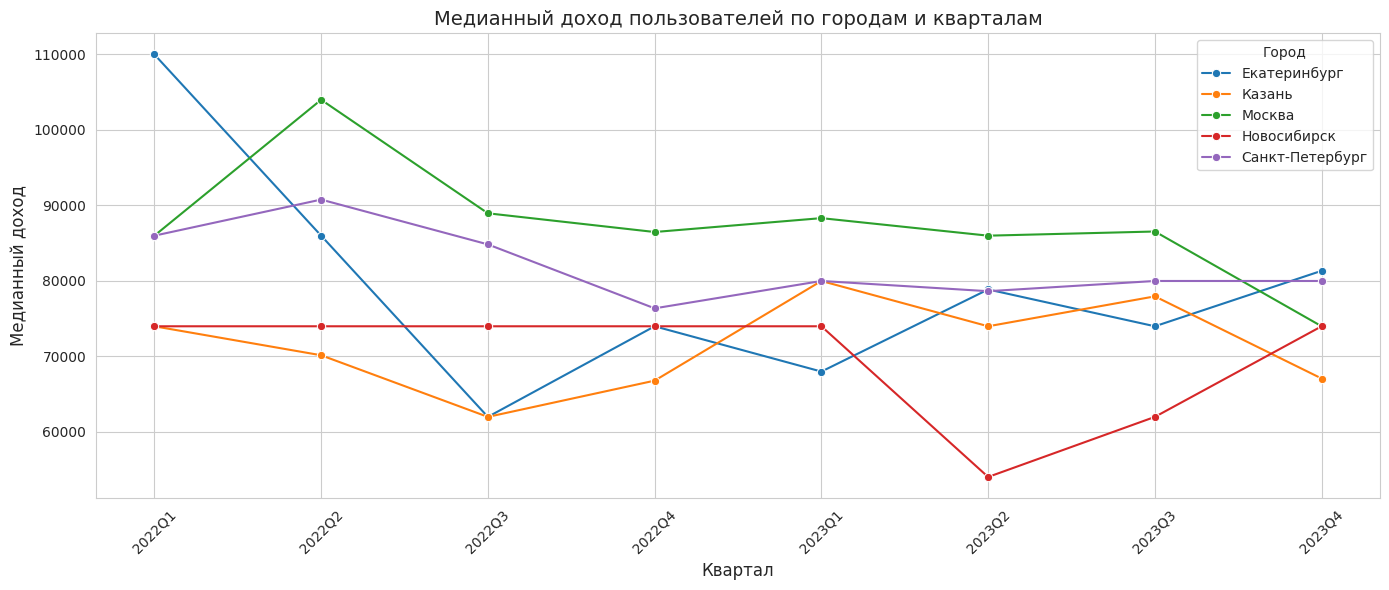

In [51]:
data["order_day"] = pd.to_datetime(data["order_day"])
data["quarter"] = data["order_day"].dt.to_period("Q")

income_by_city_quarter = data.groupby(["city_nm", "quarter"]).agg({
    "monthly_income_amt": "median",
    "client_id": "nunique"
}).reset_index().rename(columns={
    "monthly_income_amt": "median_income",
    "client_id": "unique_clients"
})

income_by_city_quarter["quarter"] = income_by_city_quarter["quarter"].astype(str)

income_by_city_quarter["median_income"] = pd.to_numeric(income_by_city_quarter["median_income"], errors="coerce")

top_cities = income_by_city_quarter.groupby("city_nm")["unique_clients"].sum().nlargest(5).index

plot_df = income_by_city_quarter[income_by_city_quarter["city_nm"].isin(top_cities)]

plt.figure(figsize=(14, 6))
sns.lineplot(data=plot_df, x="quarter", y="median_income", hue="city_nm", marker="o")
plt.title("Медианный доход пользователей по городам и кварталам")
plt.xlabel("Квартал")
plt.ylabel("Медианный доход")
plt.xticks(rotation=45)
plt.legend(title="Город")
plt.tight_layout()
plt.show()

**Вывод:** Доходы клиентов в разбивке по городам на всем временном интервале примерно одинаковы. Можно сделать вывод о том, что у сервиса всегда была однородная аудитория (не было моментов, когда сервисам начинально пользоваться экстремально богатые/бедные люди)

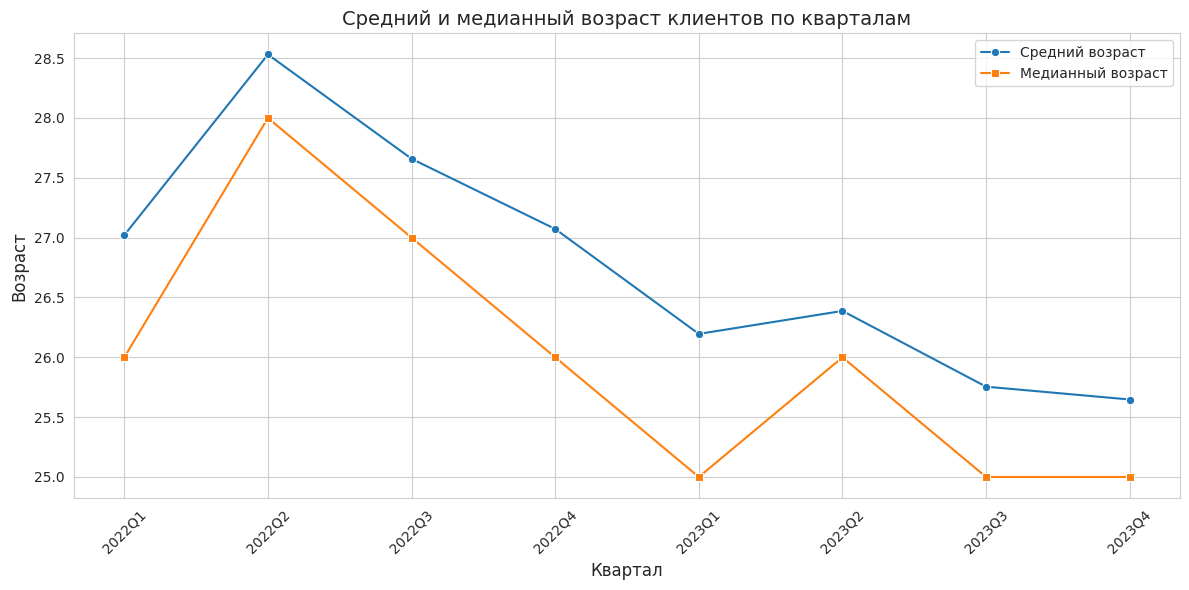

In [52]:
age_by_quarter = data.groupby("quarter").agg({
    "age": ["mean", "median", "count"]
}).reset_index()

age_by_quarter.columns = ["quarter", "mean_age", "median_age", "client_count"]

age_by_quarter["quarter"] = age_by_quarter["quarter"].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=age_by_quarter, x="quarter", y="mean_age", marker="o", label="Средний возраст")
sns.lineplot(data=age_by_quarter, x="quarter", y="median_age", marker="s", label="Медианный возраст")
plt.title("Средний и медианный возраст клиентов по кварталам")
plt.xlabel("Квартал")
plt.ylabel("Возраст")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


**Вывод:** Возраст клиентов сервиса Т-Игры стабильно снижается. В сервис приходит более молодая аудитория. Если в первой половине 2022 года аудитория Т-Игры имела медианный возраст 28 лет, то в конце 2023 года медианный возраст равен уже 25 годам.

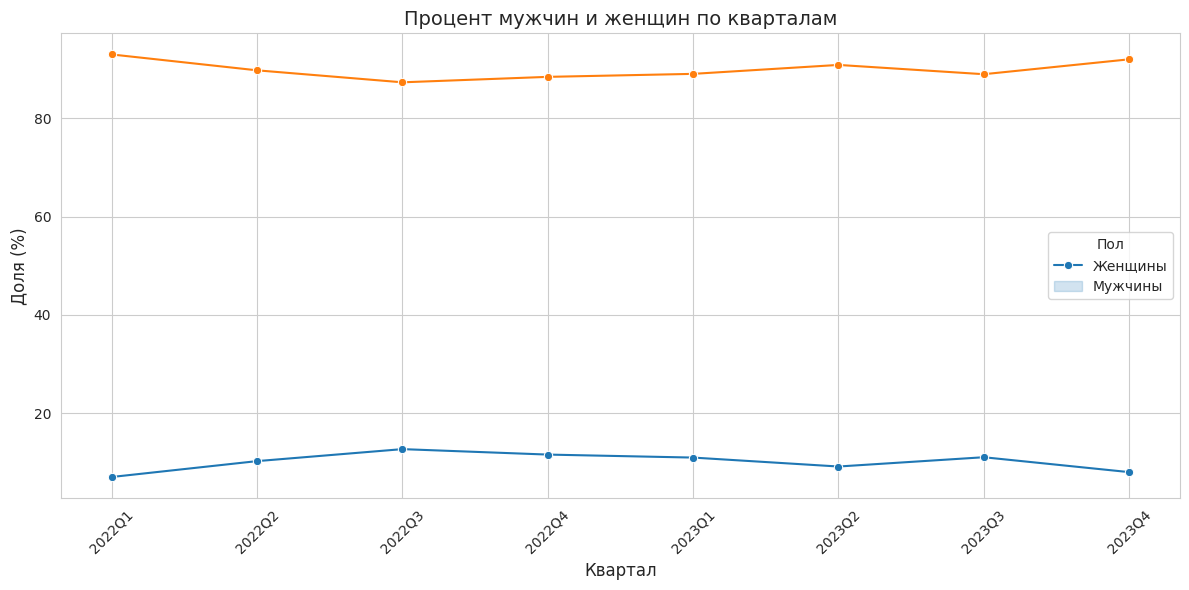

In [53]:
gender_dist = data.groupby(["quarter", "gender_cd"])["client_id"].nunique().reset_index()

total_per_quarter = gender_dist.groupby("quarter")["client_id"].sum().reset_index()
total_per_quarter.columns = ["quarter", "total_clients"]

gender_dist = gender_dist.merge(total_per_quarter, on="quarter")
gender_dist["percent"] = round(gender_dist["client_id"] / gender_dist["total_clients"] * 100, 2)

gender_dist["quarter"] = gender_dist["quarter"].astype(str)

plt.figure(figsize=(12, 6))
sns.lineplot(data=gender_dist, x="quarter", y="percent", hue="gender_cd", marker="o")
plt.title("Процент мужчин и женщин по кварталам")
plt.xlabel("Квартал")
plt.ylabel("Доля (%)")
plt.legend(title="Пол", labels=["Женщины", "Мужчины"])
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


**Вывод:** Уровень отношения клиентов-мужчин и клиентов-жещин на протяжении всего периода остается одинаковым: мужчины - 89%, девушки - 11%.

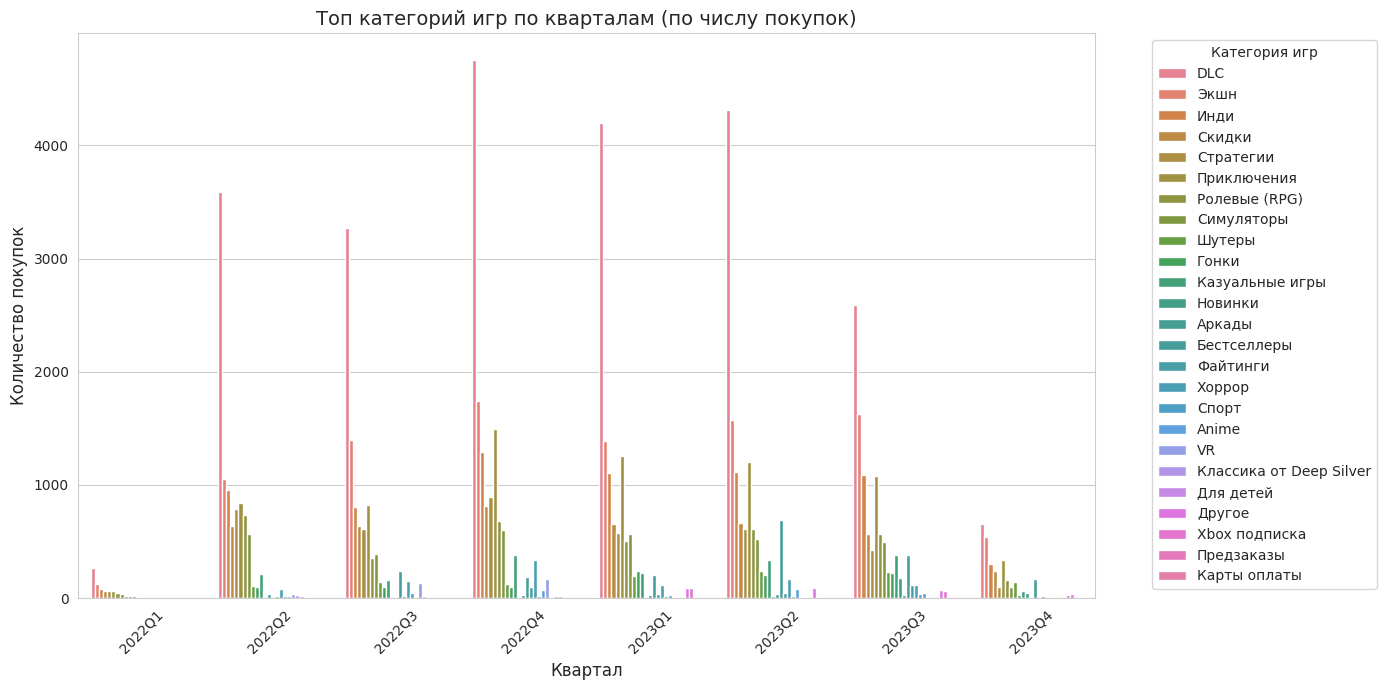

In [54]:
category_quarter = data.groupby(["quarter", "category_name"])["id"].nunique().reset_index()
category_quarter.columns = ["quarter", "category_name", "order_count"]

category_quarter["quarter"] = category_quarter["quarter"].astype(str)

top5_by_quarter = (
    category_quarter.sort_values(["quarter", "order_count"], ascending=[True, False])
    .groupby("quarter")
    .head(20)
)

plt.figure(figsize=(14, 7))
sns.barplot(
    data=top5_by_quarter,
    x="quarter",
    y="order_count",
    hue="category_name"
)
plt.title("Топ категорий игр по кварталам (по числу покупок)")
plt.ylabel("Количество покупок")
plt.xlabel("Квартал")
plt.legend(title="Категория игр", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Вывод:** Стабильно самые популярне категори: ***DLC и Экшн***. Но с начала 2023 года категории ***XBox подписка и Предзаказы*** активно начали набирать популярнсть. В целом, можно подтвердить, что спрос всегда стабильный и на протяжении всего временного периода ***самой популярной категорией является DLC***

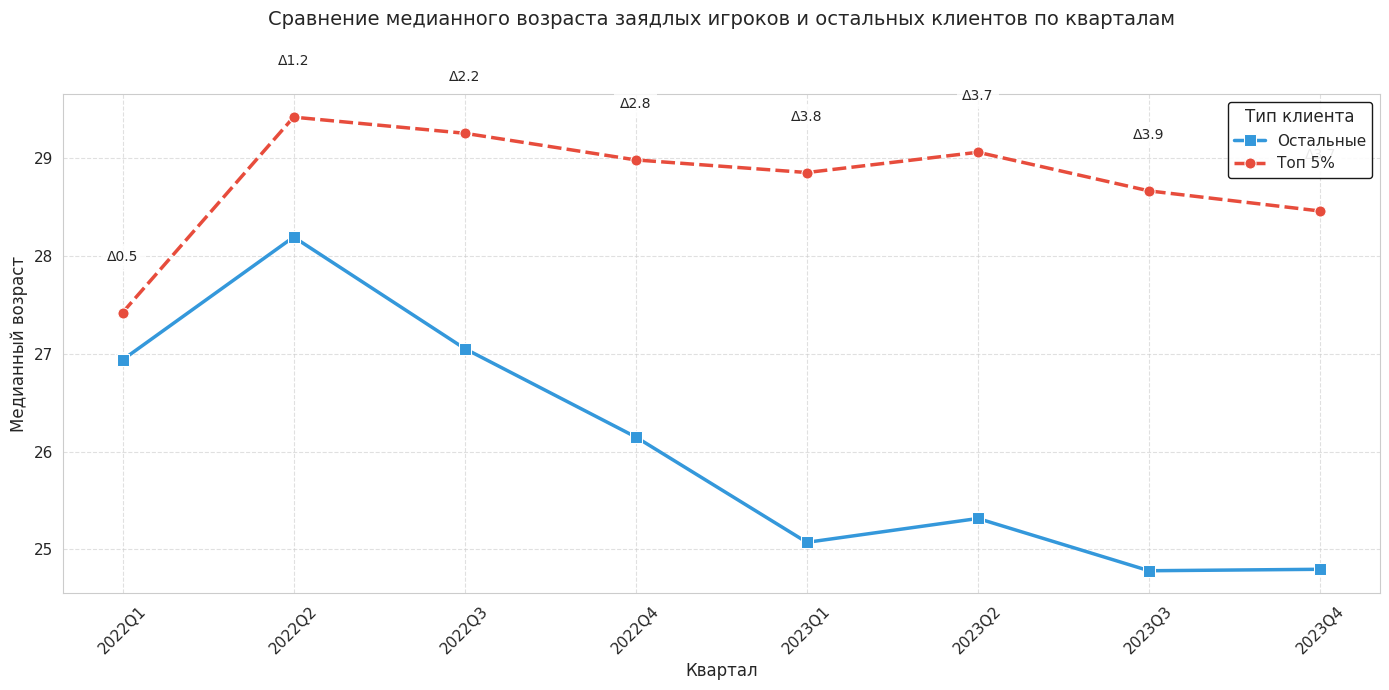

In [55]:
data['client_type'] = np.where(data['is_top_5_percent'], 'Топ 5%', 'Остальные')

age_comparison = data.groupby(["quarter", "client_type"])['age'].mean().reset_index()

age_comparison["quarter"] = age_comparison["quarter"].astype(str)

plt.figure(figsize=(14, 7))
sns.lineplot(
    data=age_comparison,
    x="quarter",
    y="age",
    hue="client_type",
    style="client_type",
    markers={'Топ 5%': 'o', 'Остальные': 's'},
    markersize=8,
    linewidth=2.5,
    palette={'Топ 5%': '#E74C3C', 'Остальные': '#3498DB'}
)

plt.title("Сравнение медианного возраста заядлых игроков и остальных клиентов по кварталам",
          fontsize=14, pad=50)
plt.xlabel("Квартал", fontsize=12)
plt.ylabel("Медианный возраст", fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

plt.legend(
    title="Тип клиента",
    title_fontsize=12,
    fontsize=11,
    loc='upper right',
    frameon=True,
    framealpha=0.9,
    edgecolor='black'
)

for quarter in age_comparison['quarter'].unique():
    top_val = age_comparison[(age_comparison['quarter'] == quarter) &
                           (age_comparison['client_type'] == 'Топ 5%')]['age'].values[0]
    other_val = age_comparison[(age_comparison['quarter'] == quarter) &
                             (age_comparison['client_type'] == 'Остальные')]['age'].values[0]

    diff = top_val - other_val
    plt.text(
        x=quarter,
        y=max(top_val, other_val) + 0.5,
        s=f"Δ{diff:.1f}",
        ha='center',
        va='bottom',
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
    )

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Вывод:** Разница в возрасте между заядлыми игроками и остальными пользователями с течением времени стабильно возрастала и не оставалась постоянной на протяжении всего временного промежутка.

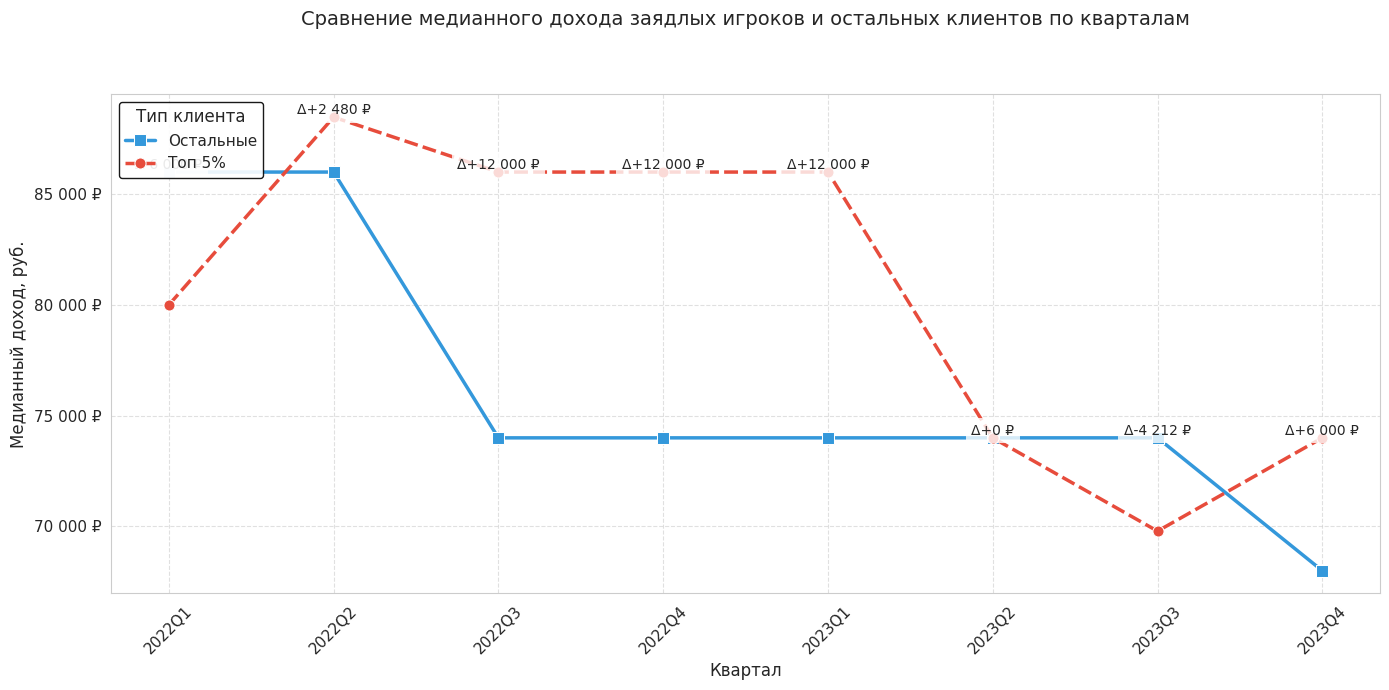

In [56]:
adults['client_type'] = np.where(adults['is_top_5_percent'], 'Топ 5%', 'Остальные')
adults["order_day"] = pd.to_datetime(adults["order_day"])
adults["quarter"] = adults["order_day"].dt.to_period("Q")

income_comparison = adults.groupby(["quarter", "client_type"])['monthly_income_amt'].median().reset_index()

income_comparison["quarter"] = income_comparison["quarter"].astype(str)

plt.figure(figsize=(14, 7))
ax = sns.lineplot(
    data=income_comparison,
    x="quarter",
    y="monthly_income_amt",
    hue="client_type",
    style="client_type",
    markers={'Топ 5%': 'o', 'Остальные': 's'},
    markersize=8,
    linewidth=2.5,
    palette={'Топ 5%': '#E74C3C', 'Остальные': '#3498DB'}
)

plt.title("Сравнение медианного дохода заядлых игроков и остальных клиентов по кварталам",
          fontsize=14, pad=50)
plt.xlabel("Квартал", fontsize=12)
plt.ylabel("Медианный доход, руб.", fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)).replace(",", " ") + " ₽"))

for quarter in income_comparison['quarter'].unique():
    top_val = income_comparison[(income_comparison['quarter'] == quarter) &
                              (income_comparison['client_type'] == 'Топ 5%')]['monthly_income_amt'].values[0]
    other_val = income_comparison[(income_comparison['quarter'] == quarter) &
                                (income_comparison['client_type'] == 'Остальные')]['monthly_income_amt'].values[0]

    diff = top_val - other_val
    diff_text = "{:+,.0f} ₽".format(diff).replace(",", " ")

    plt.text(
        x=quarter,
        y=max(top_val, other_val),
        s=f"Δ{diff_text}",
        ha='center',
        va='bottom',
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
    )

plt.legend(
    title="Тип клиента",
    title_fontsize=12,
    fontsize=11,
    loc='upper left',
    frameon=True,
    framealpha=0.9,
    edgecolor='black'
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Вывод:** Различие в доходе между заядлыми игроками и остальными пользователями не стабилен во времени. Это говорит о том, что в какой-то момент (2023 Q3) либо пришел клиент (или несколько клиентов) с большим доходом (не заядлый игрок), либо пришел заядлый игрок (или несколько игроков) с низким доходом

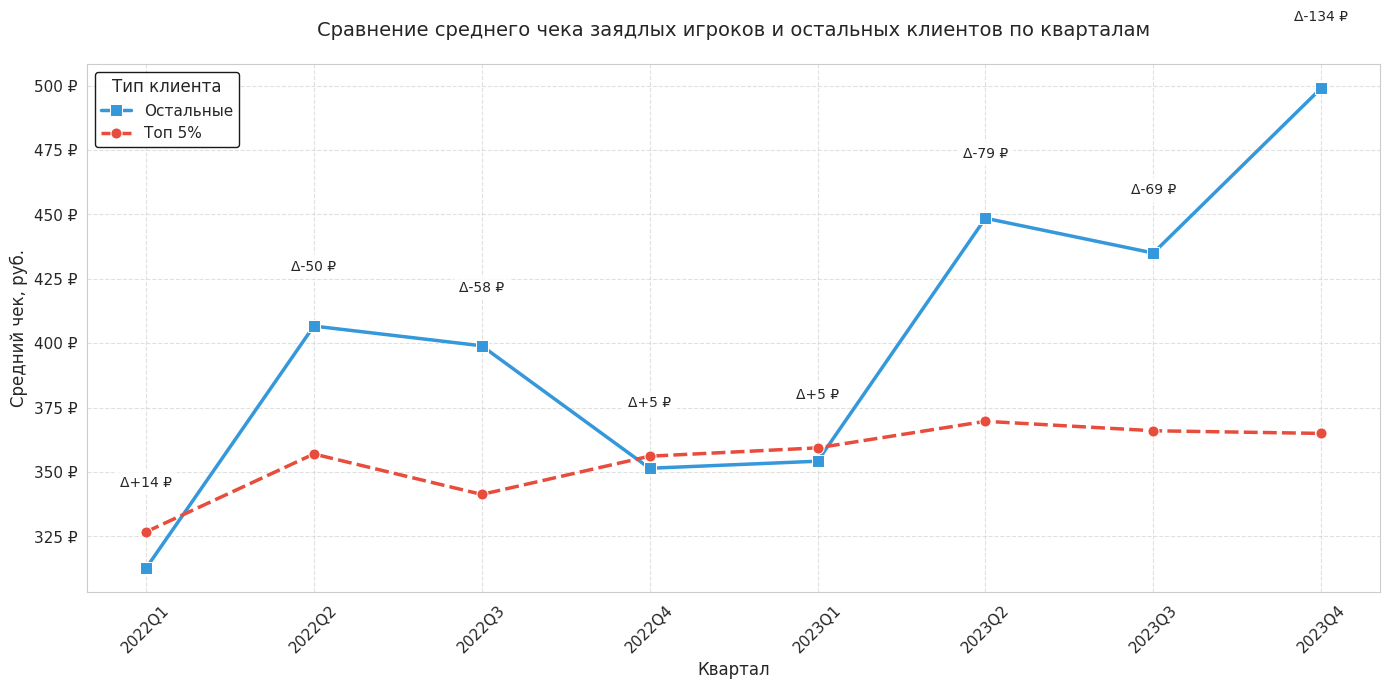

In [57]:
client_stats = data.groupby('client_id').agg(
    total_spent=('good_price', 'sum'),
    order_count=('id', 'nunique')
).reset_index()

client_stats['avg_check'] = client_stats['total_spent'] / client_stats['order_count']


top_clients = data[data['is_top_5_percent']]['client_id'].unique()
client_stats['client_type'] = np.where(
    client_stats['client_id'].isin(top_clients),
    'Топ 5%',
    'Остальные'
)


client_stats = client_stats.merge(
    data[['client_id', 'quarter']].drop_duplicates(),
    on='client_id'
)

avg_check_comparison = client_stats.groupby(['quarter', 'client_type'])['avg_check'].median().reset_index()
avg_check_comparison['quarter'] = avg_check_comparison['quarter'].astype(str)


plt.figure(figsize=(14, 7))
ax = sns.lineplot(
    data=avg_check_comparison,
    x='quarter',
    y='avg_check',
    hue='client_type',
    style='client_type',
    markers={'Топ 5%': 'o', 'Остальные': 's'},
    markersize=8,
    linewidth=2.5,
    palette={'Топ 5%': '#E74C3C', 'Остальные': '#3498DB'}
)

plt.title('Сравнение среднего чека заядлых игроков и остальных клиентов по кварталам',
          fontsize=14, pad=20)
plt.xlabel('Квартал', fontsize=12)
plt.ylabel('Средний чек, руб.', fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)).replace(",", " ") + " ₽"))

for quarter in avg_check_comparison['quarter'].unique():
    top_val = avg_check_comparison[(avg_check_comparison['quarter'] == quarter) &
                                 (avg_check_comparison['client_type'] == 'Топ 5%')]['avg_check'].values[0]
    other_val = avg_check_comparison[(avg_check_comparison['quarter'] == quarter) &
                                   (avg_check_comparison['client_type'] == 'Остальные')]['avg_check'].values[0]

    diff = top_val - other_val
    diff_text = "{:+,.0f} ₽".format(diff).replace(",", " ")

    plt.text(
        x=quarter,
        y=max(top_val, other_val) * 1.05,
        s=f"Δ{diff_text}",
        ha='center',
        va='bottom',
        fontsize=10,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='none')
    )

plt.legend(
    title='Тип клиента',
    title_fontsize=12,
    fontsize=11,
    loc='upper left',
    frameon=True,
    framealpha=0.9,
    edgecolor='black'
)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

**Вывод:** Средний чек заядлых игроков и остальных клиентов меняется с течением времени. Можно заметить, что сначала 2023 года разница растет и среднем чек заядлых игроков всё меньше и меньше по сравнению с остальными игроками.

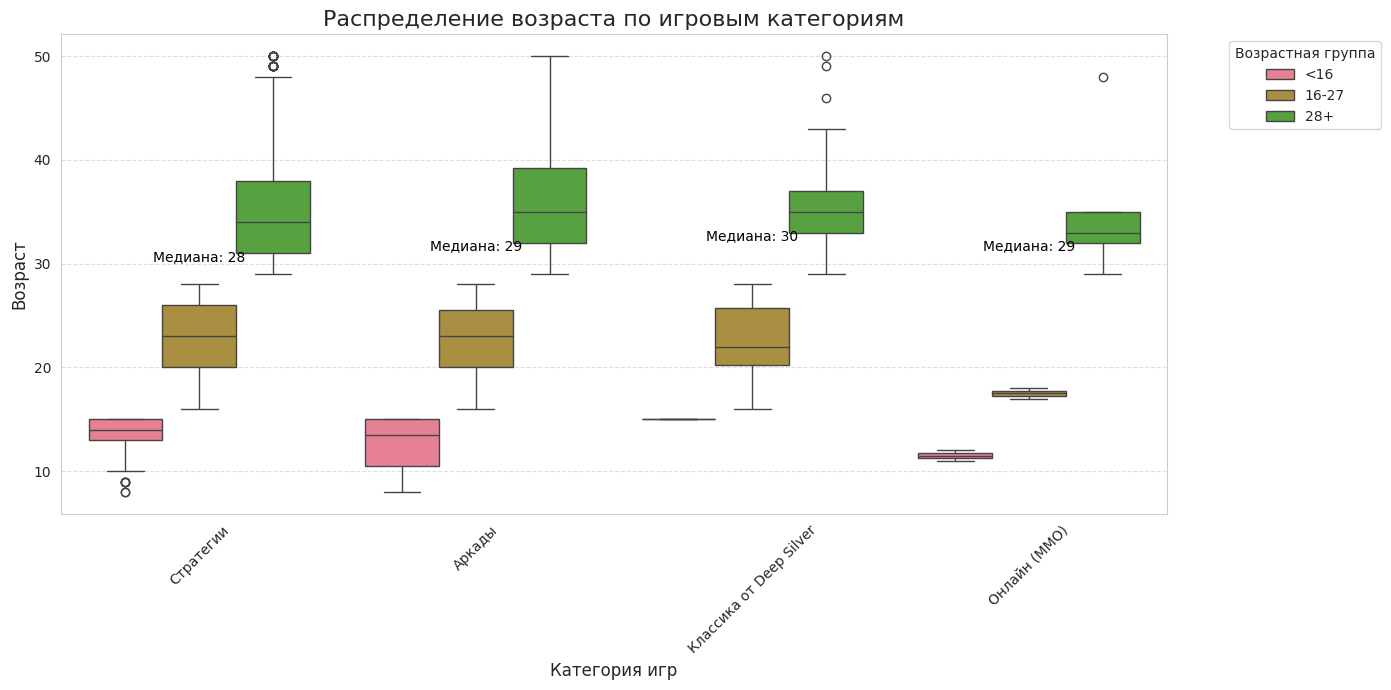

<Figure size 1400x700 with 0 Axes>

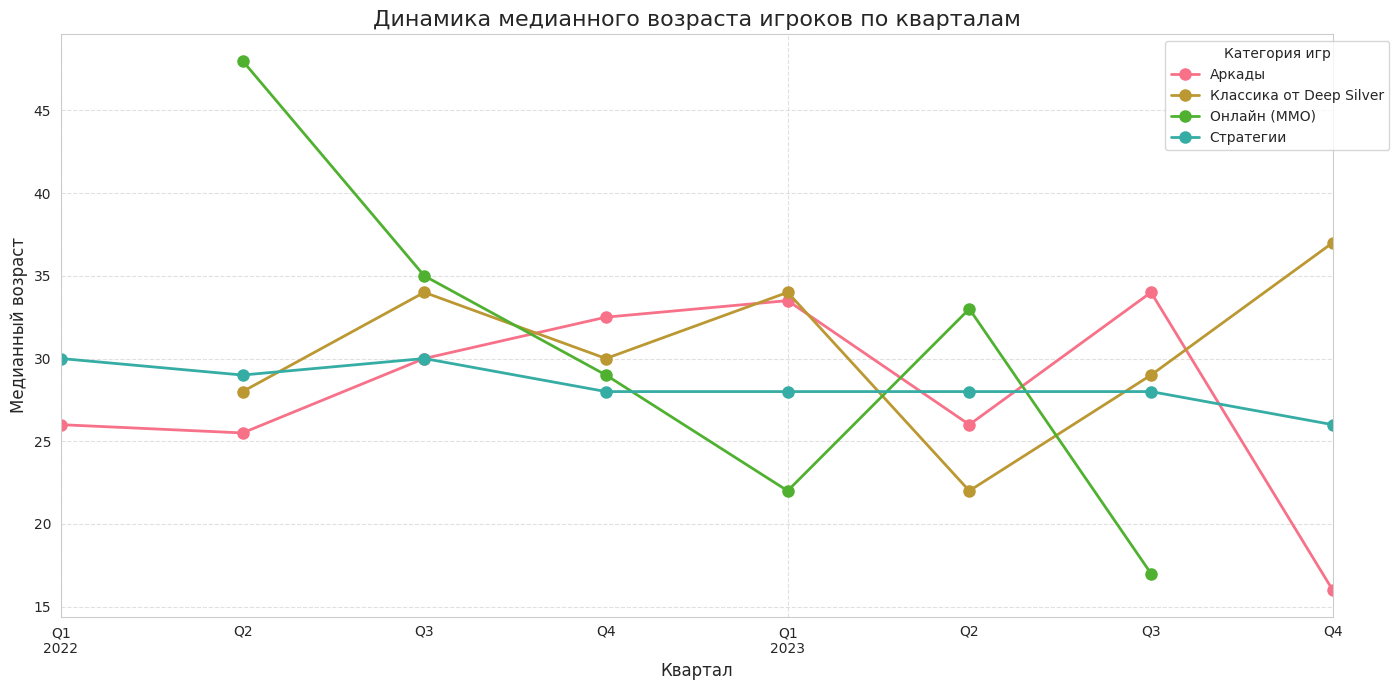

H-statistic       p-value
Стратегии                3152.562595  0.000000e+00
Аркады                    131.108365  3.389849e-29
Классика от Deep Silver    67.922512  1.781615e-15
Онлайн (MMO)                6.533333  3.813333e-02

In [58]:
focus_categories = ['Стратегии', 'Аркады', 'Классика от Deep Silver', 'Онлайн (MMO)']
filtered_data = data[data['category_name'].isin(focus_categories)].copy()
filtered_data['age_group'] = pd.cut(
    filtered_data['age'],
    bins=[0, 15, 28, 100],
    labels=['<16', '16-27', '28+']
)
plt.figure(figsize=(14, 7))
sns.set_palette("husl")
ax = sns.boxplot(
    data=filtered_data,
    x='category_name',
    y='age',
    hue='age_group',
    dodge=True,
    width=0.8
)

plt.title('Распределение возраста по игровым категориям', fontsize=16)
plt.xlabel('Категория игр', fontsize=12)
plt.ylabel('Возраст', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Возрастная группа', bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.6)

for i, category in enumerate(focus_categories):
    med_age = filtered_data[filtered_data['category_name'] == category]['age'].median()
    ax.text(i, med_age+2, f'Медиана: {med_age:.0f}',
            ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()
trend_data = filtered_data.groupby(['quarter', 'category_name'])['age'].median().unstack()

plt.figure(figsize=(14, 7))
trend_data.plot(
    marker='o',
    linestyle='-',
    linewidth=2,
    markersize=8,
    figsize=(14, 7)
)

plt.title('Динамика медианного возраста игроков по кварталам', fontsize=16)
plt.xlabel('Квартал', fontsize=12)
plt.ylabel('Медианный возраст', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Категория игр', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

results = {}
for category in focus_categories:
    samples = [
        filtered_data[(filtered_data['category_name'] == category) &
                    (filtered_data['age_group'] == age_gr)]['age']
        for age_gr in ['<16', '16-27', '28+']
    ]
    stat, pval = kruskal(*samples)
    results[category] = {'H-statistic': stat, 'p-value': pval}

pd.DataFrame(results).T

**Вывод:** Стабильным медианный возраст клиентов можно назвать только в категории Стратегии. Остальные же категории в течение всего временного промежутка претерпевали изменения в возрасте пользователей.

Результаты теста хи-квадрат:
Хи-квадрат = 17.54, p-value = 0.0000


<Figure size 1400x800 with 0 Axes>

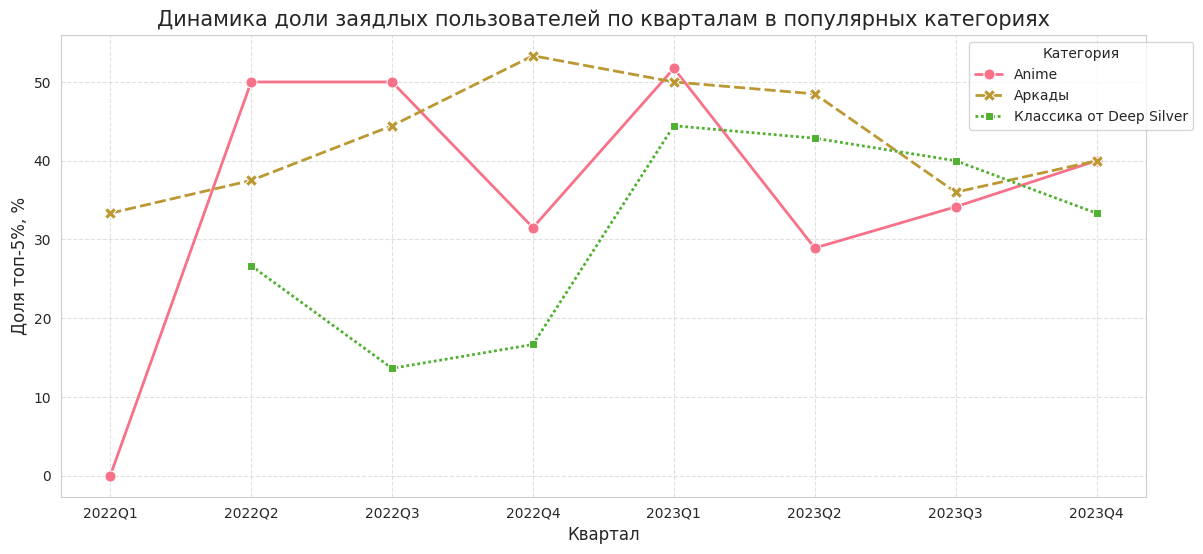

In [59]:
focus_categories = ['Аркады', 'Anime', 'Классика от Deep Silver']
focus_data = data[data['category_name'].isin(focus_categories)].copy()

category_stats = focus_data.groupby('category_name').agg(
    total_clients=('client_id', 'nunique'),
    top_clients=('client_id', lambda x: x.isin(data[data['is_top_5_percent']]['client_id']).sum())
).reset_index()

category_stats['top_share'] = category_stats['top_clients'] / category_stats['total_clients'] * 100

other_cats_stats = data[~data['category_name'].isin(focus_categories)].groupby('category_name').agg(
    total_clients=('client_id', 'nunique'),
    top_clients=('client_id', lambda x: x.isin(data[data['is_top_5_percent']]['client_id']).sum())
).reset_index()
other_cats_stats['top_share'] = other_cats_stats['top_clients'] / other_cats_stats['total_clients'] * 100

plt.figure(figsize=(14, 8))

contingency_table = pd.crosstab(
    data['category_name'].isin(focus_categories),
    data['client_id'].isin(data[data['is_top_5_percent']]['client_id'])
)

chi2, pval, _, _ = chi2_contingency(contingency_table)

print(f"Результаты теста хи-квадрат:")
print(f"Хи-квадрат = {chi2:.2f}, p-value = {pval:.4f}")

quarterly_share = focus_data.groupby(['quarter', 'category_name'], ).apply(
    lambda x: pd.Series({
        'top_share': x['client_id'].isin(data[data['is_top_5_percent']]['client_id']).mean() * 100
    }), include_groups=False
).reset_index()

quarterly_share["quarter"] = quarterly_share["quarter"].astype(str)

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=quarterly_share,
    x='quarter',
    y='top_share',
    hue='category_name',
    style='category_name',
    markers=True,
    markersize=8,
    linewidth=2
)
plt.title('Динамика доли заядлых пользователей по кварталам в популярных категориях', fontsize=15)
plt.xlabel('Квартал', fontsize=12)
plt.ylabel('Доля топ-5%, %', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Категория', bbox_to_anchor=(1.05, 1))
plt.show()

**Вывод:** У заядлых пользователей нет одного конкретного доминирующего лидера среди категорий игр. На протяжении всего временного промежутка лидер менятеся, но топ-3 популярных остается прежним.

**Итоговый вывод по 4 Вопросу:**

*Справедливы ли выводы предыдущих пунктов на всем представленном временном промежутке?*

1. Выводы по 1 Вопросу:

> *Клиенты Т-Игры в среднем на 4 года младше остальных клиентов Т-Банка.*
*  Этот вывод справедлив только для последних двух кварталов 2023 года. В начале наблюдейний в среднем клиенты Т-Игры были всего на 2 года младше остальных клиентов Т-Банка.

> *Среди клиентов Т-Игры ~90% составляют мужчины в отличие от обычных клиентов банка, распределение которых практически равное 50% - мужчины, 49% - девушки*
* Да, этот вывод справедлив на всём временном промежутке.

> *Клиенты Т-Игр в среднем зарабатывают на 35-40% больше, чем остальные клиенты Т-Банка*
* Да, этот вывод верен для всего временного промежутка.

2. Выводы по 2 Вопросу:

> Медианный возраст заядлых игроков на 4 года больше медианного возраста остальных пользователей.
*   Нет, этот вывод справедлив только для 2023 года. В период 2022 года разница в возрасте не была столько велика.

> Медианный доход заядлых игроков на 4000 больше медианного дохода остальных клиентов.
* Нет, сначала доходы заядлых игроков действительно были выше доход остальных пользователей, но к Q3 2023 всё изменилось. Теперь доходы двух этих групп клиентов практически равны.

> Средний чек покупок у заядлых игроков на ~100 рублей ниже, чем у остальных клиентов.
* Нет, этот вывод верен только для данных последнего периода. В начале работы сервиса Средний чек заядлых игроков был меньше всего на 50 рублей, а в конце 2022 - начале 2023 и вовсе больше среднего чека остальных клиентов.

3. Выводы по 3 Вопросу:

>  По возрасту можно выделить 3 категории игр, которые нацелены на более старшую аудиторию (28+ лет): ***Стратегии, Аркады, Классика от Deep Silver.*** У молодой аудитории (16+ лет) наиболее популярны игры в жанре ***Онлайн(ММО).***
* Нет, этот вывод справедлив только для категории ***Стратегии***. Остальные же категории имеют разные возрастные ЦА в разные периоды времени.

> Заядлые игроки чаще всего выбирают ***Аркады, Anime и Классику от Deep Silver.***
* Да, этот тренд созраняется на протяжении всего периода, рассматриваемого в датасете.














**Поставленная задача 2:**
Предположим, что мы задумались над оптимальностью текущих ценовых политик и решили понять, стоит ли улучшить или ухудшить скидки на игры. Ваша задача провести исследование эластичности спроса пользователей к цене, то есть понять, какой будет объем продаж в зависимости от цены. На представленных данных вряд ли можно получить точное предсказание, поэтому необходимо проанализировать свойства спроса по косвенным признакам. Ожидаемый результат работы: рекомендации и набор действий по максимизации выручки для издателей видеоигр.

Определим "Что такое эластичность спроса?"

Эластичность спроса по цене — это мера того, как изменение цены влияет на объём продаж.

* Если |ε| > 1, спрос эластичен → цена сильно влияет на продажи.

* Если |ε| < 1, спрос неэластичен → цена влияет слабо.

**Этап 1:** Анализ текущей ценовой политики

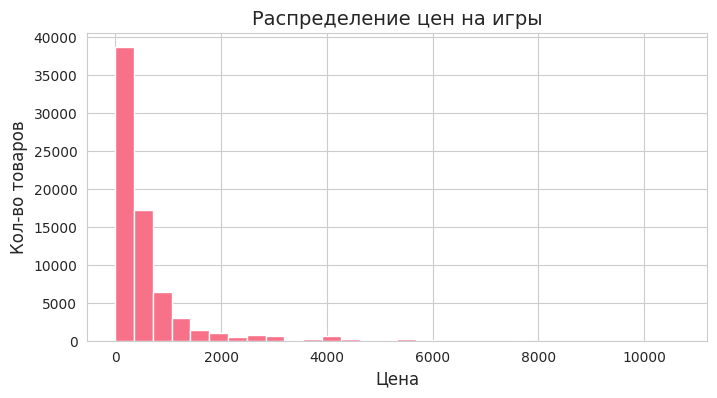

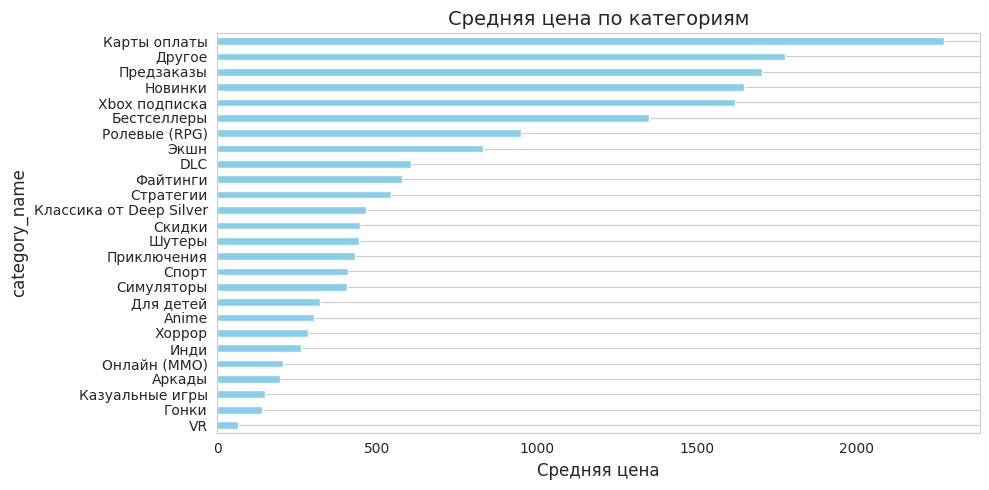

In [60]:
data['good_price'].hist(bins=30, figsize=(8, 4), grid=True)
plt.title("Распределение цен на игры")
plt.xlabel("Цена")
plt.ylabel("Кол-во товаров")
plt.show()

avg_price_cat = data.groupby("category_name")["good_price"].mean().sort_values()
plt.figure(figsize=(10, 5))
avg_price_cat.plot(kind="barh", color="skyblue")
plt.title("Средняя цена по категориям")
plt.xlabel("Средняя цена")
plt.grid(axis="x")
plt.tight_layout()
plt.show()


Заметим, что все цены в основном сфокусированы в пределах 200-2000 руб. Есть редкие премиальные за 3000+.
Самые дешевые игры из категории VR, самые дорогие - пополнение счетов Playstation и других игровых валют.

Проверим возможность расчета эластичности

In [61]:
price_variation = data.groupby("good_id")["good_price"].nunique()
multi_price_games = price_variation[price_variation > 1]
print("Игры с несколькими ценами:", multi_price_games.count())

Игры с несколькими ценами: 1821


В датасете есть игры с разными ценами, это означает, что мы сможем посчитать реакцию спроса с учетом скидок на те или иные игры.

**Этап 2:** Проверка эластичности цен в каждой из категорий

In [62]:
agg = data.groupby(['category_name', 'good_id', 'good_price']).agg(
    units_sold=('good_cnt', 'sum'),
    steam_score=('steam_popularity_score', 'mean')
).reset_index()
agg = agg[(agg['units_sold'] > 0) & (agg['good_price'] > 0)]

agg["log_units"] = np.log(agg["units_sold"])
agg["log_price"] = np.log(agg["good_price"])
agg["log_steam_score"] = np.log(agg["steam_score"] + 1)

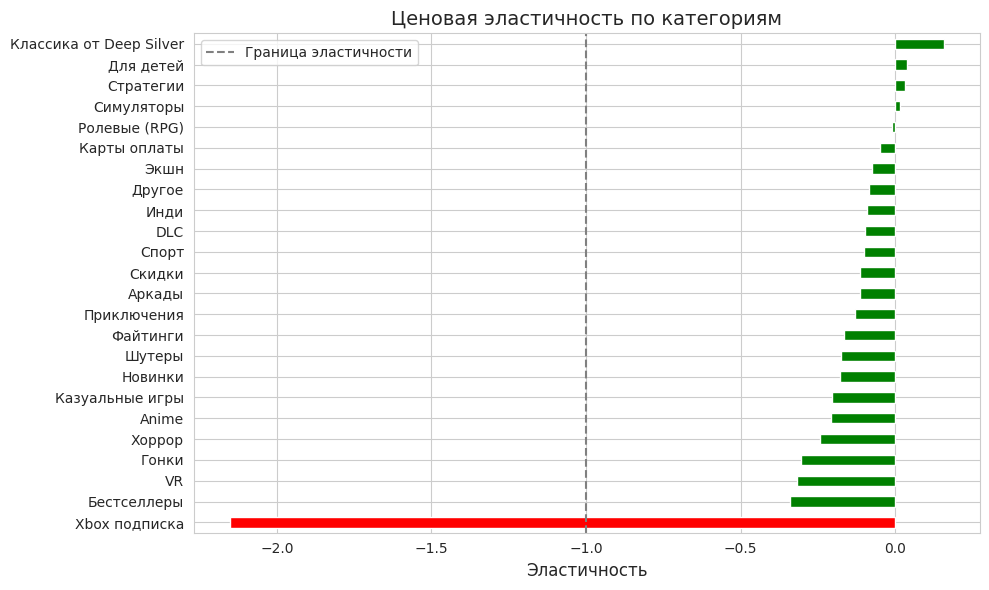

In [63]:
elasticities = {}
for cat in agg["category_name"].unique():
    subset = agg[agg["category_name"] == cat]
    if subset["log_price"].nunique() > 1 and len(subset) > 5:
        model = smf.ols("log_units ~ log_price", data=subset).fit()
        elasticities[cat] = round(model.params["log_price"], 3)

elas_data = pd.Series(elasticities).sort_values()
plt.figure(figsize=(10, 6))
elas_data.plot(kind="barh", color=["green" if e > -1 else "red" for e in elas_data])
plt.axvline(x=-1, color="gray", linestyle="--", label="Граница эластичности")
plt.title("Ценовая эластичность по категориям")
plt.xlabel("Эластичность")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Видим, что цена эластична только у Xbox подписки. В таком случае при уменьшении цены выручка будет расти.
**Совет:** сделать скидку на товар.

У остальных категорий цена неэластична.
**Совет:** Можно спокойно увеличитвать цену, спрос от этого не упадет, а вот выручка будет расти.

Отдельно про категории RPG и Симуляторы: в этих категориях эластичность близка к нулю.
**Совет:** Цена не влияет. Нужно сделать фокус на маркетинг и качество товара.

Проверим влияние рейтинга игры в топ-5000 Steam на спрос и эластичность цены.

In [64]:
model_controlled = smf.ols("log_units ~ log_price + log_steam_score", data=agg).fit()
print("Модель с учетом Steam-популярности")
print(model_controlled.summary())

Модель с учетом Steam-популярности
                            OLS Regression Results                            
Dep. Variable:              log_units   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     121.4
Date:                Tue, 13 May 2025   Prob (F-statistic):           6.99e-53
Time:                        14:13:23   Log-Likelihood:                -16992.
No. Observations:               11446   AIC:                         3.399e+04
Df Residuals:                   11443   BIC:                         3.401e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Interce

**Вывод:** Есть зависимость спроса от рейтинга в топ-5000 Steam. Чем выше рейтинг, тем стабильнее спрос.

**Этап 3:** Финальные рекомендации

In [65]:
def interpret_elasticity(e):
    if e < -1:
        return "Эластичный спрос: скидки могут увеличить выручку"
    elif -1 <= e < 0:
        return "Неэластичный спрос: можно повышать цену"
    else:
        return "Цена не влияет: фокус на маркетинг и качество"

print("Рекомендации по категориям:")
for cat, e in elas_data.items():
    print(f"{cat:25} | эластичность: {e:>5} | {interpret_elasticity(e)}")

Рекомендации по категориям:
Xbox подписка             | эластичность: -2.153 | Эластичный спрос: скидки могут увеличить выручку
Бестселлеры               | эластичность: -0.339 | Неэластичный спрос: можно повышать цену
VR                        | эластичность: -0.316 | Неэластичный спрос: можно повышать цену
Гонки                     | эластичность: -0.305 | Неэластичный спрос: можно повышать цену
Хоррор                    | эластичность: -0.242 | Неэластичный спрос: можно повышать цену
Anime                     | эластичность: -0.206 | Неэластичный спрос: можно повышать цену
Казуальные игры           | эластичность: -0.204 | Неэластичный спрос: можно повышать цену
Новинки                   | эластичность: -0.177 | Неэластичный спрос: можно повышать цену
Шутеры                    | эластичность: -0.174 | Неэластичный спрос: можно повышать цену
Файтинги                  | эластичность: -0.164 | Неэластичный спрос: можно повышать цену
Приключения               | эластичность: -0.13 | Неэ

**Интерпретация результатов и выводы:**

* У большинства категорий спрос нечувствителен к цене, особенно при контроле за популярностью игр.

* Steam популярность действительно влияет, но не критично (R² всё равно низкий).

**Рекомендации и набор действий по максимизации выручки для издателей видеоигр:**
1. Повышение цены на игры может увеличить выручку — спрос не обвалится.

2. Скидки будут полезны только для промо или роста базы, но не как способ повышения выручки.

3. Учитывайте Steam-популярность: у популярных игр спрос более устойчивый.

4. Для точного прогноза стоит учесть больше факторов: сезонность, поведение клиентов, формат игры и т.д.
